# Submission Pertama: Menyelesaikan Permasalahan Human Resources

- Nama: M Rizal Muhaimin
- Email: muhaimin.rizal@student.unmer.ac.id
- Id Dicoding: m_rizal_muhaimin

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import os
import joblib

### Menyiapkan data yang akan digunakan

#### Gathering Data

In [2]:
# Melakukan import dataset
dataset = "https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/employee/employee_data.csv"

df = pd.read_csv(dataset)

In [3]:
# Menampilkan dataset
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


#### Asessing Data

In [4]:
# Cek jumlah data
print("Jumlah baris, Jumlah kolom")
print(df.shape)

Jumlah baris, Jumlah kolom
(1470, 35)


In [5]:
# Cek info dan tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

Konteks dataset:
* EmployeeId - ID karyawan
* Attrition - Apakah ada pengurangan karyawan? (0=tidak, 1=ya)
* Age - Umur karyawan
* BusinessTravel - Perjalanan Bisnis yang dilakukan untuk perkerjaan
* DailyRate - Gaji Harian dari karyawan
* Department - Department dimana karyawan bekerja
* DistanceFromHome - Jarak dari tempat bekerja ke rumah (km)
* Education - 1-Below College, 2-College, 3-Bachelor, 4-Master,5-Doctor
* EducationField - Bidang pendidikan
* EnvironmentSatisfaction - 1-Low, 2-Medium, 3-High, 4-Very High
* Gender - Jenis Kelamin
* HourlyRate - Gaji per jam
* JobInvolvement - 1-Low, 2-Medium, 3-High, 4-Very High
* JobLevel - Level dari pekerjaan (1 sampai 5)
* JobRole - Jabatan
* JobSatisfaction - 1-Low, 2-Medium, 3-High, 4-Very High
* MaritalStatus - Status Pernikahan
* MonthlyIncome - Pendapatan perbulan
* MonthlyRate - Gaji perbulan
* NumCompaniesWorked - Jumlah perusahaan tempat bekerja
* Over18 - Umur diatas 18 Tahun?
* OverTime - Lembur?
* PercentSalaryHike - Persentase kenaikan gaji tahun lalu
* PerformanceRating - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
* RelationshipSatisfaction - 1-Low, 2-Medium, 3-High, 4-Very High
* StandardHours - Jam Kerja Standar
* StockOptionLevel - Tingkat Opsi Saham
* TotalWorkingYears - Jumlah Total tahun bekerja
* TrainingTimesLastYear - Jumlah pelatihan yang diikuti tahun lalu
* WorkLifeBalance - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
* YearsAtCompany - Lama di Perusahaan (Tahun)
* YearsInCurrentRole - Lama di posisi saat ini (Tahun)
* YearsSinceLastPromotion - Tahun sejak promosi terakhir (Tahun)
* YearsWithCurrManager - Lama bekerja dengan manajer saat ini (Tahun)

In [6]:
# Cek data unik (tipe data objek)

for fitur in df:
  if df[fitur].dtype == "object":
    print(f"Fitur {fitur}")
    print(df[fitur].unique(),"\n")

Fitur BusinessTravel
['Travel_Frequently' 'Travel_Rarely' 'Non-Travel'] 

Fitur Department
['Human Resources' 'Research & Development' 'Sales'] 

Fitur EducationField
['Other' 'Medical' 'Life Sciences' 'Marketing' 'Technical Degree'
 'Human Resources'] 

Fitur Gender
['Male' 'Female'] 

Fitur JobRole
['Human Resources' 'Healthcare Representative' 'Research Scientist'
 'Sales Executive' 'Manager' 'Laboratory Technician' 'Research Director'
 'Manufacturing Director' 'Sales Representative'] 

Fitur MaritalStatus
['Married' 'Single' 'Divorced'] 

Fitur Over18
['Y'] 

Fitur OverTime
['Yes' 'No'] 



In [7]:
# Cek missing value
print("Missing value")
print(df.isna().sum())

Missing value
EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance           

In [8]:
# Menampilkan data yang terdapat missing value
print("Data yang terdapat missing value (di kolom attririon)")
print(df.loc[df["Attrition"].isna() == True ])

Data yang terdapat missing value (di kolom attririon)
      EmployeeId  Age  Attrition     BusinessTravel  DailyRate  \
0              1   38        NaN  Travel_Frequently       1444   
4              5   40        NaN      Travel_Rarely       1194   
5              6   29        NaN      Travel_Rarely        352   
12            13   47        NaN      Travel_Rarely        571   
18            19   25        NaN  Travel_Frequently        772   
...          ...  ...        ...                ...        ...   
1443        1444   24        NaN  Travel_Frequently        567   
1447        1448   42        NaN  Travel_Frequently        288   
1448        1449   38        NaN      Travel_Rarely        437   
1462        1463   41        NaN      Travel_Rarely       1206   
1466        1467   50        NaN      Travel_Rarely        813   

                  Department  DistanceFromHome  Education    EducationField  \
0            Human Resources                 1          4             Othe

In [9]:
# Cek duplikasi data
print("Duplikasi data")
print(df.duplicated().sum())

Duplikasi data
0


In [10]:
# Cek jumlah data attrition

attrition, not_attrition, missing_data = 0, 0, 0

for nilai in df["Attrition"]:
  if nilai == 0:
    not_attrition +=1
  elif nilai == 1:
    attrition +=1
  else:
    missing_data +=1

print("Data attrition")
print(f"Jumlah Pegawai (tidak Atrrition)  : {not_attrition}")
print(f"Jumlah Pegawai (Atrrition)        : {attrition}")
print(f"Jumlah Data Kosong                : {missing_data}")

Data attrition
Jumlah Pegawai (tidak Atrrition)  : 879
Jumlah Pegawai (Atrrition)        : 179
Jumlah Data Kosong                : 412


In [11]:
# Cek jumlah data over18

over18, not_over18 = 0, 0

for nilai in df["Over18"]:
  if nilai == "Y":
    over18 +=1
  else:
    not_over18 +=1

print("Data over18")
print(f"Jumlah Pegawai (diatas umur 18)       : {over18}")
print(f"Jumlah Pegawai (tidak diatas umur 18) : {not_over18}")

Data over18
Jumlah Pegawai (diatas umur 18)       : 1470
Jumlah Pegawai (tidak diatas umur 18) : 0


#### Cleaning Data

In [12]:
# Menghapus missing value
df.dropna(axis=0, inplace=True)

# Cek missing value setelah dihapus
print("Cek missing value setelah dihapus")
print(df.isna().sum())

# cek jumlah data
print("\nJumlah data setelah missing value dihapus")
print(df.shape)

Cek missing value setelah dihapus
EmployeeId                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsI

In [13]:
# Mengubah tipe data

# Mengubah tipe data fitur attrition (float -> int)
df["Attrition"] = df["Attrition"].astype(int)

In [14]:
# Hapus kolom yang tidak dibutuhkan dan buat dataset baru

kolom_dihapus = ["Over18", "EmployeeCount"]

main_df = df.drop(kolom_dihapus, axis=1)

# Cek tipe data
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1058 entries, 1 to 1469
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeId                1058 non-null   int64 
 1   Age                       1058 non-null   int64 
 2   Attrition                 1058 non-null   int64 
 3   BusinessTravel            1058 non-null   object
 4   DailyRate                 1058 non-null   int64 
 5   Department                1058 non-null   object
 6   DistanceFromHome          1058 non-null   int64 
 7   Education                 1058 non-null   int64 
 8   EducationField            1058 non-null   object
 9   EnvironmentSatisfaction   1058 non-null   int64 
 10  Gender                    1058 non-null   object
 11  HourlyRate                1058 non-null   int64 
 12  JobInvolvement            1058 non-null   int64 
 13  JobLevel                  1058 non-null   int64 
 14  JobRole                 

In [15]:
# Menampilkan dataset
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1058 entries, 1 to 1469
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeId                1058 non-null   int64 
 1   Age                       1058 non-null   int64 
 2   Attrition                 1058 non-null   int64 
 3   BusinessTravel            1058 non-null   object
 4   DailyRate                 1058 non-null   int64 
 5   Department                1058 non-null   object
 6   DistanceFromHome          1058 non-null   int64 
 7   Education                 1058 non-null   int64 
 8   EducationField            1058 non-null   object
 9   EnvironmentSatisfaction   1058 non-null   int64 
 10  Gender                    1058 non-null   object
 11  HourlyRate                1058 non-null   int64 
 12  JobInvolvement            1058 non-null   int64 
 13  JobLevel                  1058 non-null   int64 
 14  JobRole                 

In [16]:
# Mengonversi data

# Fungsi untuk mengonversi fitur yang memiliki nilai Low -> Very High
def fungsi_konversi_fitur(fitur):
    if fitur == "Education":
        main_df[fitur] = main_df[fitur].apply(lambda x: "Below College" if x == 1 else "College" if x == 2 else "Bachelor" if x == 3 else "Master" if x == 4 else "Doctor")
    elif fitur == "WorkLifeBalance":
        main_df[fitur] = main_df[fitur].apply(lambda x: "Low" if x == 1 else "Good" if x == 2 else "Excellent" if x == 3 else "Outstanding")
    else:
        for my_fitur in fitur:
            main_df[my_fitur] = main_df[my_fitur].apply(lambda x: "Low" if x == 1 else "Medium" if x == 2 else "High" if x == 3 else "Very High")
    return main_df


# Menjalankan fungsi untuk konversi
fitur_yang_dikonversi_1 = "Education"
main_df = fungsi_konversi_fitur(fitur_yang_dikonversi_1)

fitur_yang_dikonversi_2 = ["EnvironmentSatisfaction", "JobInvolvement", "JobSatisfaction", "PerformanceRating", "RelationshipSatisfaction"]
main_df = fungsi_konversi_fitur(fitur_yang_dikonversi_2)

fitur_yang_dikonversi_3 = "WorkLifeBalance"
main_df = fungsi_konversi_fitur(fitur_yang_dikonversi_3)

In [17]:
# Cek setiap kolom sebelum konversi data
df.iloc[:,[0,7,10,13,16,24,25,30]].head()

,EmployeeId,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
1,2,2,1,1,2,3,1,1
2,3,4,1,3,3,3,3,4
3,4,3,3,3,2,3,4,4
6,7,2,2,1,4,4,3,2
7,8,3,4,3,1,3,4,3


In [18]:
# Cek setiap kolom yang dilakukan konversi data
main_df.iloc[:,[0,7,9,12,15,22,23,28]].head()

,EmployeeId,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
1,2,College,Low,Low,Medium,High,Low,Low
2,3,Master,Low,High,High,High,High,Outstanding
3,4,Bachelor,High,High,Medium,High,Very High,Outstanding
6,7,College,Medium,Low,Very High,Very High,High,Good
7,8,Bachelor,Very High,High,Low,High,Very High,Excellent


In [19]:
# Menampilkan dataset
main_df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,2,37,1,Travel_Rarely,1141,Research & Development,11,College,Medical,Low,...,Low,80,0,15,2,Low,1,0,0,0
2,3,51,1,Travel_Rarely,1323,Research & Development,4,Master,Life Sciences,Low,...,High,80,3,18,2,Outstanding,10,0,2,7
3,4,42,0,Travel_Frequently,555,Sales,26,Bachelor,Marketing,High,...,Very High,80,1,23,2,Outstanding,20,4,4,8
6,7,40,0,Travel_Rarely,1124,Sales,1,College,Medical,Medium,...,High,80,3,6,2,Good,4,3,0,2
7,8,55,1,Travel_Rarely,725,Research & Development,2,Bachelor,Medical,Very High,...,Very High,80,1,24,2,Excellent,5,2,1,4


#### Ekspor dataset

In [20]:
# Ekspor dataset yang akan digunakan untuk membuat business dashboard dan prediksi ML
# dataset untuk business dashboard
main_df.to_csv("df_employee_for_dash.csv", index=False)

# dataset untuk streamlit dashboard (ML)
main_df.iloc[:20].to_csv("df_employee_for_ML.csv", index=False)

## Data Understanding

### Exploratory Data Analysis

#### Statistik Deskriptif

In [21]:
# Ringkasan Statatistik Deskriptif untuk fitur Kategorikal
main_df.describe(include="object")

,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,OverTime,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
count,1058,1058,1058,1058,1058,1058,1058,1058,1058,1058,1058,1058,1058,1058
unique,3,3,5,6,4,2,4,9,4,3,2,2,4,4
top,Travel_Rarely,Research & Development,Bachelor,Life Sciences,High,Male,High,Sales Executive,Very High,Married,No,High,High,Excellent
freq,746,701,410,436,335,620,625,232,340,464,751,899,324,638


In [22]:
# Ringkasan Statatistik Deskriptif untuk fitur numerik
main_df.describe()

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.0,1058.000000,1058.000000,1058.000000,1058.000000,1058.00000,1058.000000,1058.000000
mean,736.656900,37.055766,0.169187,809.542533,8.978261,65.643667,2.090737,6625.945180,14267.281664,2.706994,15.155955,80.0,0.762760,11.435728,2.769376,7.065217,4.26087,2.203214,4.142722
std,427.440538,9.410421,0.375094,408.478049,8.040608,20.324861,1.136514,4837.695042,7048.077305,2.523526,3.641097,0.0,0.837537,8.016429,1.302689,6.265227,3.61747,3.266948,3.599044
min,2.000000,18.000000,0.000000,102.000000,1.000000,30.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,80.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,364.250000,30.000000,0.000000,465.250000,2.000000,48.000000,1.000000,2900.250000,8277.250000,1.000000,12.000000,80.0,0.000000,6.000000,2.000000,3.000000,2.00000,0.000000,2.000000
50%,731.500000,36.000000,0.000000,817.500000,7.000000,65.000000,2.000000,4903.500000,14201.000000,2.000000,14.000000,80.0,1.000000,10.000000,3.000000,5.000000,3.00000,1.000000,3.000000
75%,1117.750000,43.000000,0.000000,1168.500000,13.000000,83.000000,3.000000,8736.500000,20364.000000,4.000000,18.000000,80.0,1.000000,16.000000,3.000000,9.000000,7.00000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,100.000000,5.000000,19999.000000,26999.000000,9.000000,25.000000,80.0,3.000000,40.000000,6.000000,40.000000,18.00000,15.000000,17.000000


#### Kolerlasi fitur

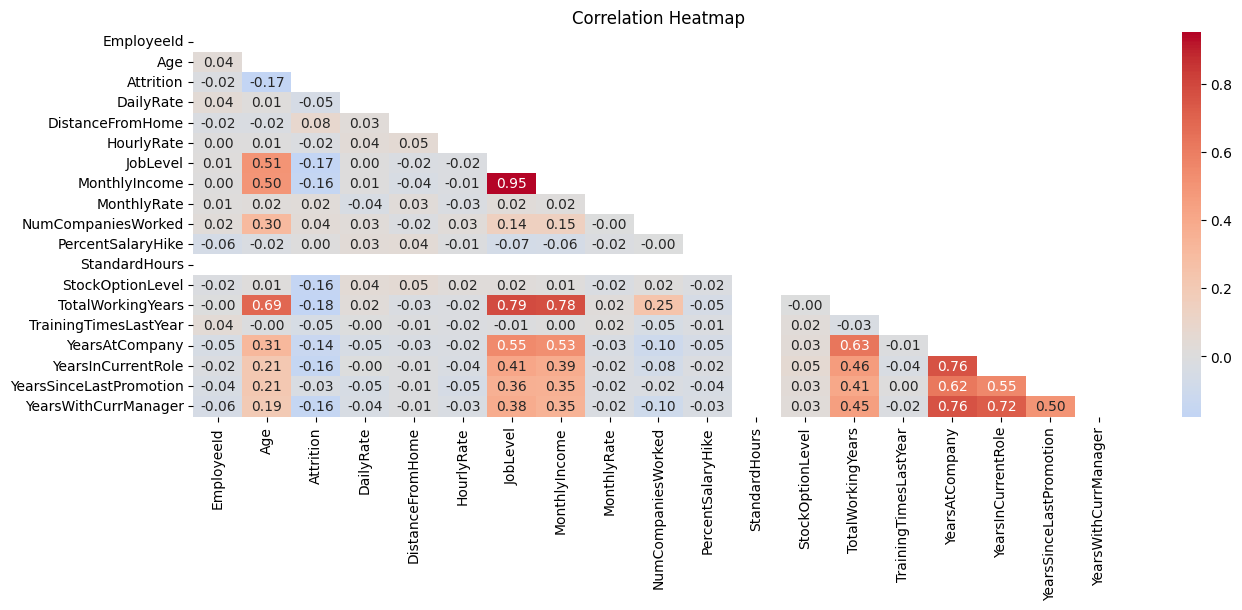

In [23]:
# correlation matrix

fig, axe = plt.subplots(figsize=(15,5))
correlation_matrix = main_df.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Beberapa hal menarik dari heatmap diatas:
1. Korelasi fitur terhadap dirinya sendiri sesuai yaitu sama dengan 1.

2. Age memiliki korelasi yang sangat kuat dengan TotalWorkingYears, karena semakin bertambah umur akan cenderung memiliki total tahun bekerja yang semakin lama.

3. Age memiliki korelasi yang kuat dengan JobLevel , karena karyawan yang lebih tua umumnya akan cenderung menempati posisi yang lebih tinggi di perusahaan.

4. Age memiliki korelasi yang kuat dengan MonthlyIncome, karena karyawan yang lebih berumur pasti akan mendapatkan penghasilan yang lebih besar.

5. JobLevel memiliki korelasi yang sangat kuat dengan MonthlyIncome, karena karyawan yang lebih senior cenderung memiliki penghasilan yang lebih besar

5. JobLevel memiliki korelasi yang kuat dengan TotalWorkingYears, karena karyawan senior pasti telah bekerja untuk rentang waktu yang lebih lama.

6. MonthlyIncome memiliki korelasi yang kuat dengan TotalWorkingYears, karena karyawan yang memiliki total tahun bekerja yang lebih banyak memiliki penghasilan yang lebih besar

7. YearsWithCurrManager sangat terkait dengan YearsAtCompany.

8. YearsAtCompany berhubungan dengan YearsInCurrentRole.



#### Distribusi Fitur Numerik dari dataset

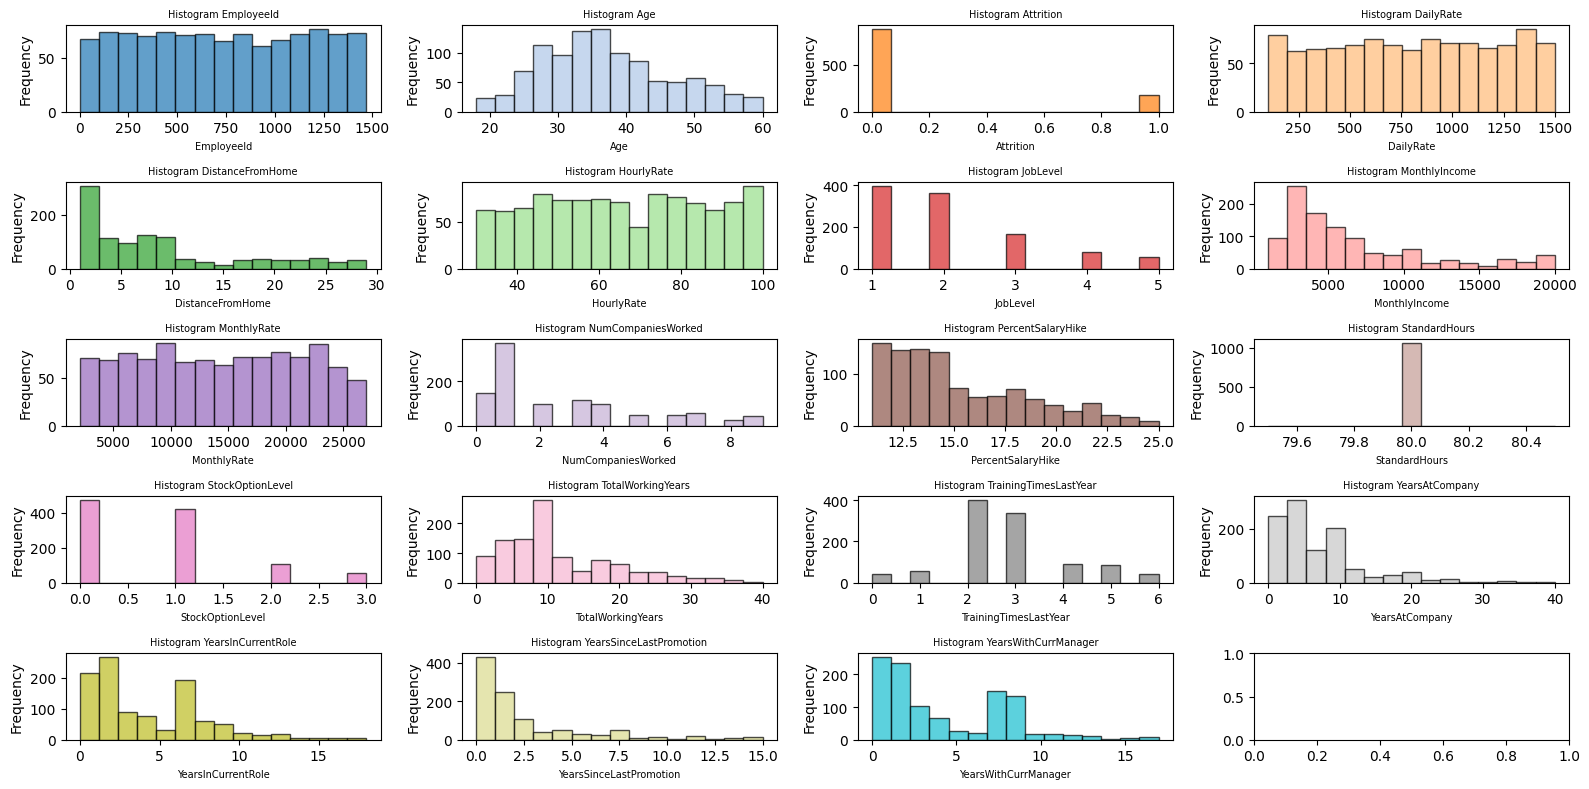

In [24]:
# Melihat distribusi feature numerik menggunakan grafik histogram

numerik_fitur = []

for fitur in main_df.columns:
  if main_df[fitur].dtype != "object":
     numerik_fitur.append(fitur)


# Mendefenisikan jumlah dari histogram & jumlah grid-nya
num_histograms = len(numerik_fitur)
num_rows = 5
num_cols = 4

# Membuat figure & subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 8))
axes_flat = axes.flatten()

# Mengatur warna histogram
colors = plt.cm.tab20.colors[:num_histograms]

# Membuat setiap histogram dengan warna unik
for i, (column, ax) in enumerate(zip(numerik_fitur, axes_flat)):
  main_df[column].plot.hist(ax=ax, bins=15, alpha=0.7, color=colors[i], edgecolor='black')
  ax.set_title(f'Histogram {column}', fontsize = 7)
  ax.set_xlabel(column, fontsize = 7)

# Menampilkan grafik histogram
plt.tight_layout()
plt.show()

Berdasarkan grafik di atas, dapat kita lihat bahwa terdapat beberapa fitur numerik yang berbentuk right-skewed distribution, seperti DistanceFromHome, MonhtlyIncome, NumCompaniesWorked, PercentageSalaryHike, TotalWorkingYears, YearsAtCompany, YearsCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager. Disisi lain, fitur Age dan TrainingTimeLastYear tergolong dalam normal distribution.

#### Distribusi Fitur Numerik berdasarkan fitur Kategorikal yang lain

In [25]:
# Membuat Helper Function untuk menggambarkan distribusi fitur numerik dengan boxplot
def numerical_dis_plot(features, df, segment_feature=None, showfliers=True):
    fig, ax = plt.subplots(len(features), 1,figsize=(16,20))
    for i, feature in enumerate(features):
        if segment_feature:
            sns.boxplot(y=segment_feature, x=feature, data=df, ax=ax[i], showfliers=showfliers)
            ax[i].set_title(f'Grafik {feature} berdasarkan {segment_feature}', fontsize = 14)
            ax[i].set_ylabel(None)
        else:
            sns.boxplot(x=feature, data=df, ax=ax[i], showfliers=showfliers)
    plt.tight_layout()
    plt.show()

##### Distribusi Fitur Numerik berdasarkan Fitur Education

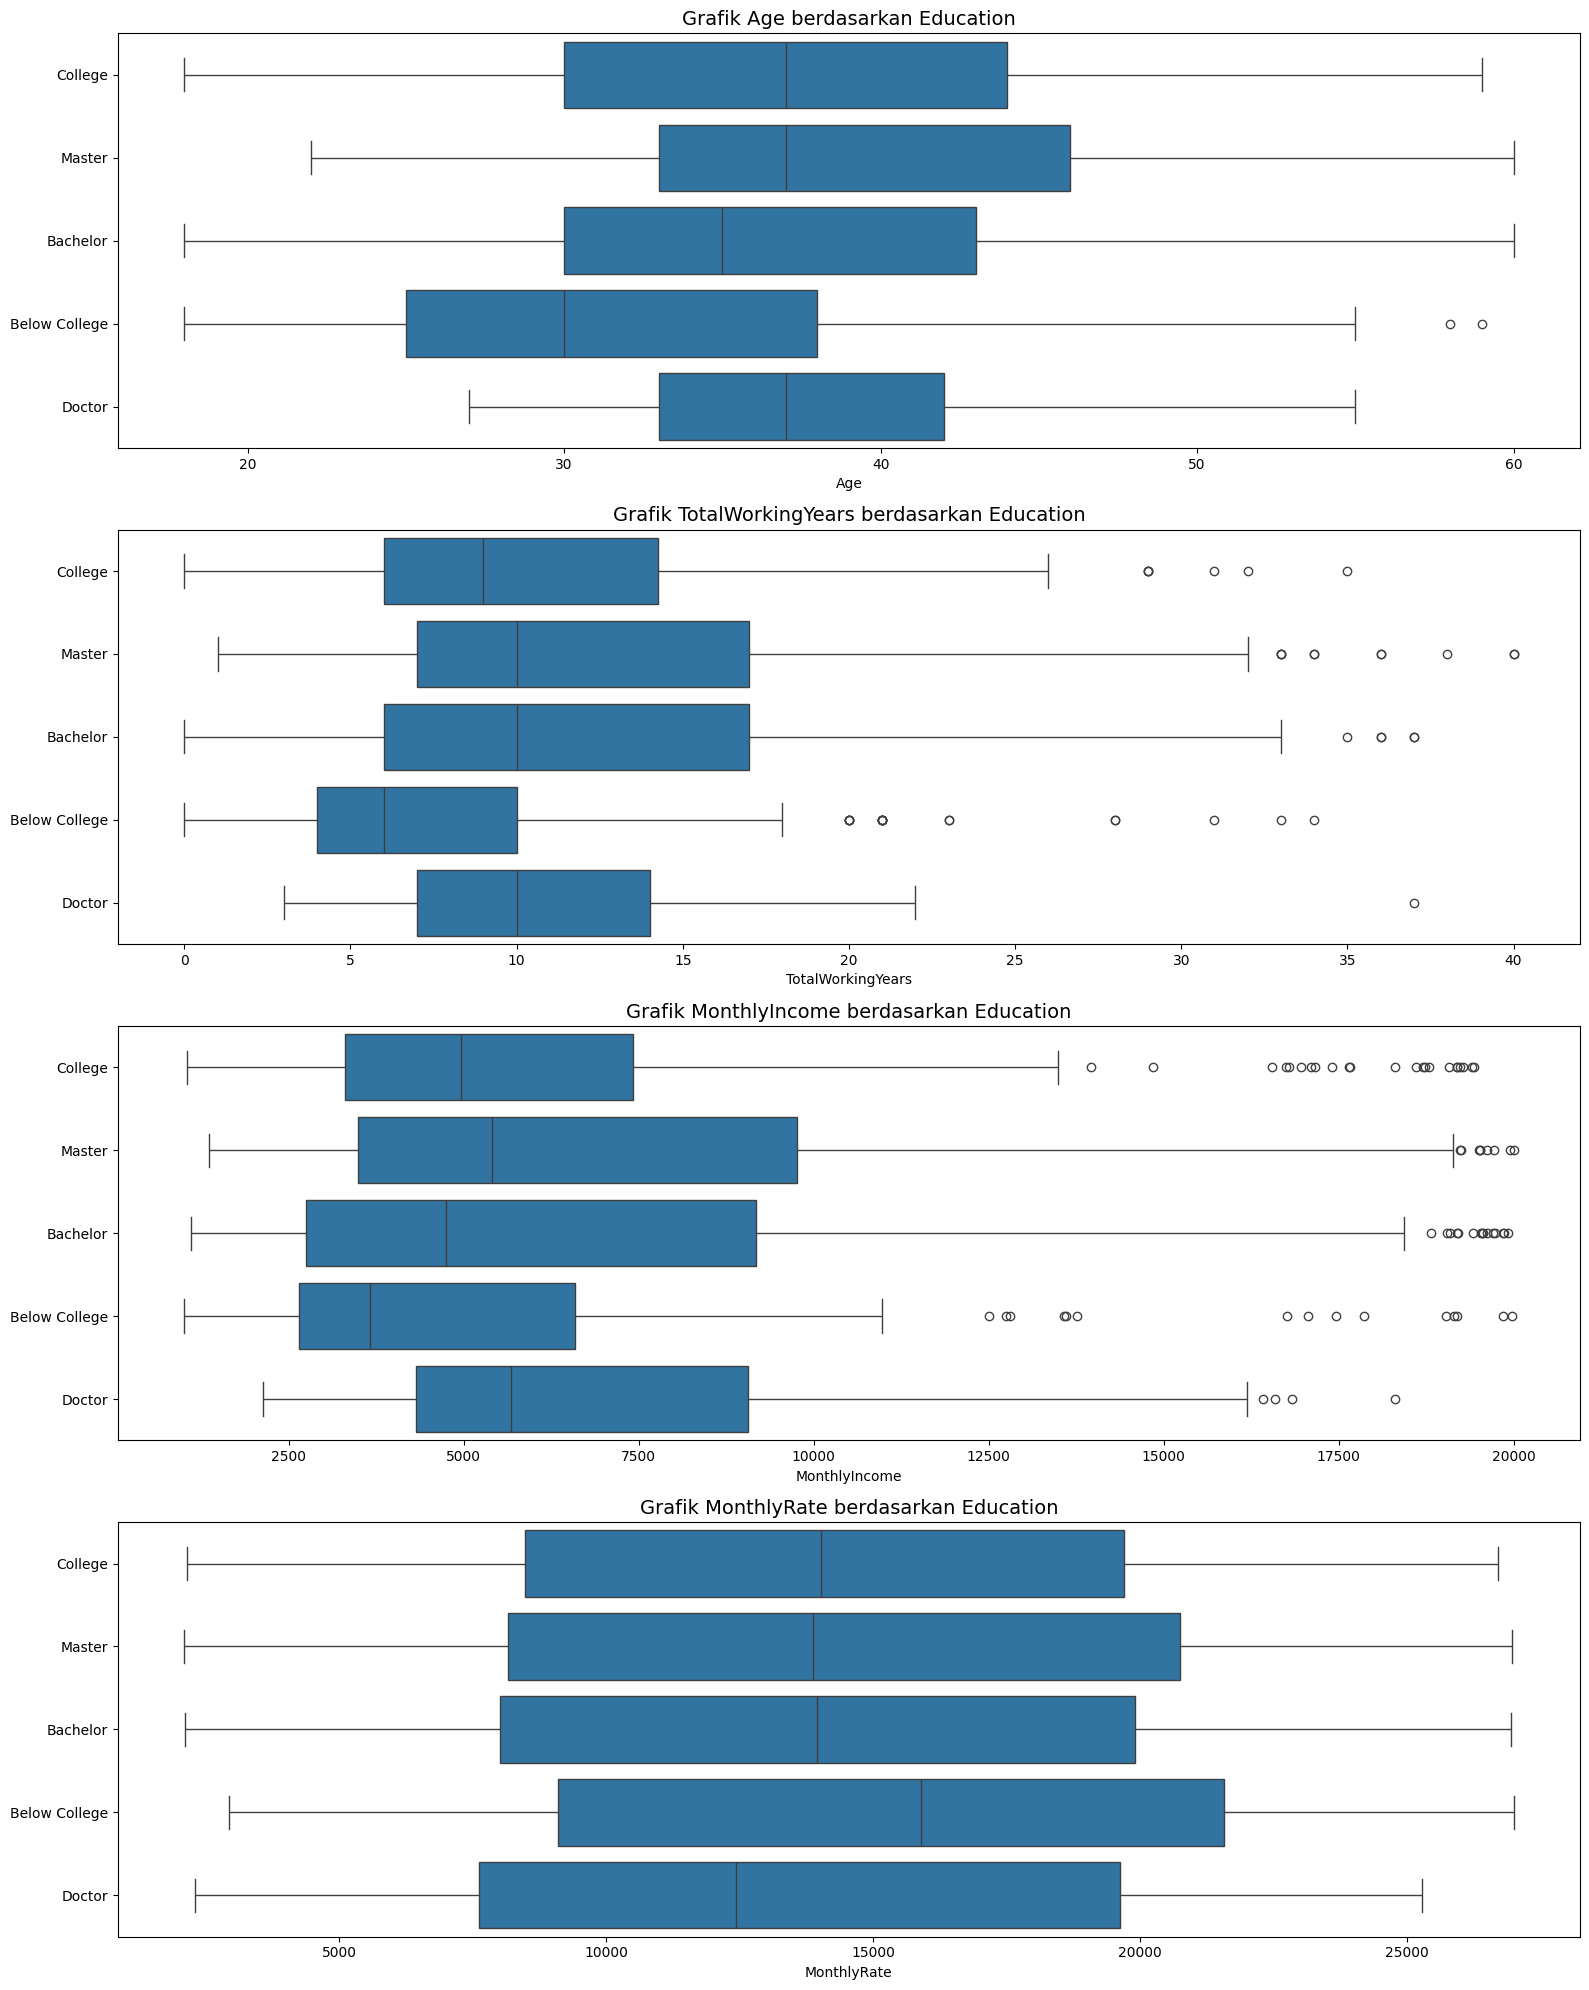

In [26]:
# 1. Fungsi untuk menggambarkan distribusi fitur numerik berdasarkan Education
numerical_dis_plot(
    features=["Age", "TotalWorkingYears", "MonthlyIncome", "MonthlyRate"],
    df=main_df,
    segment_feature="Education"
)

##### Distribusi Fitur Numerik berdasarkan Fitur JobRole

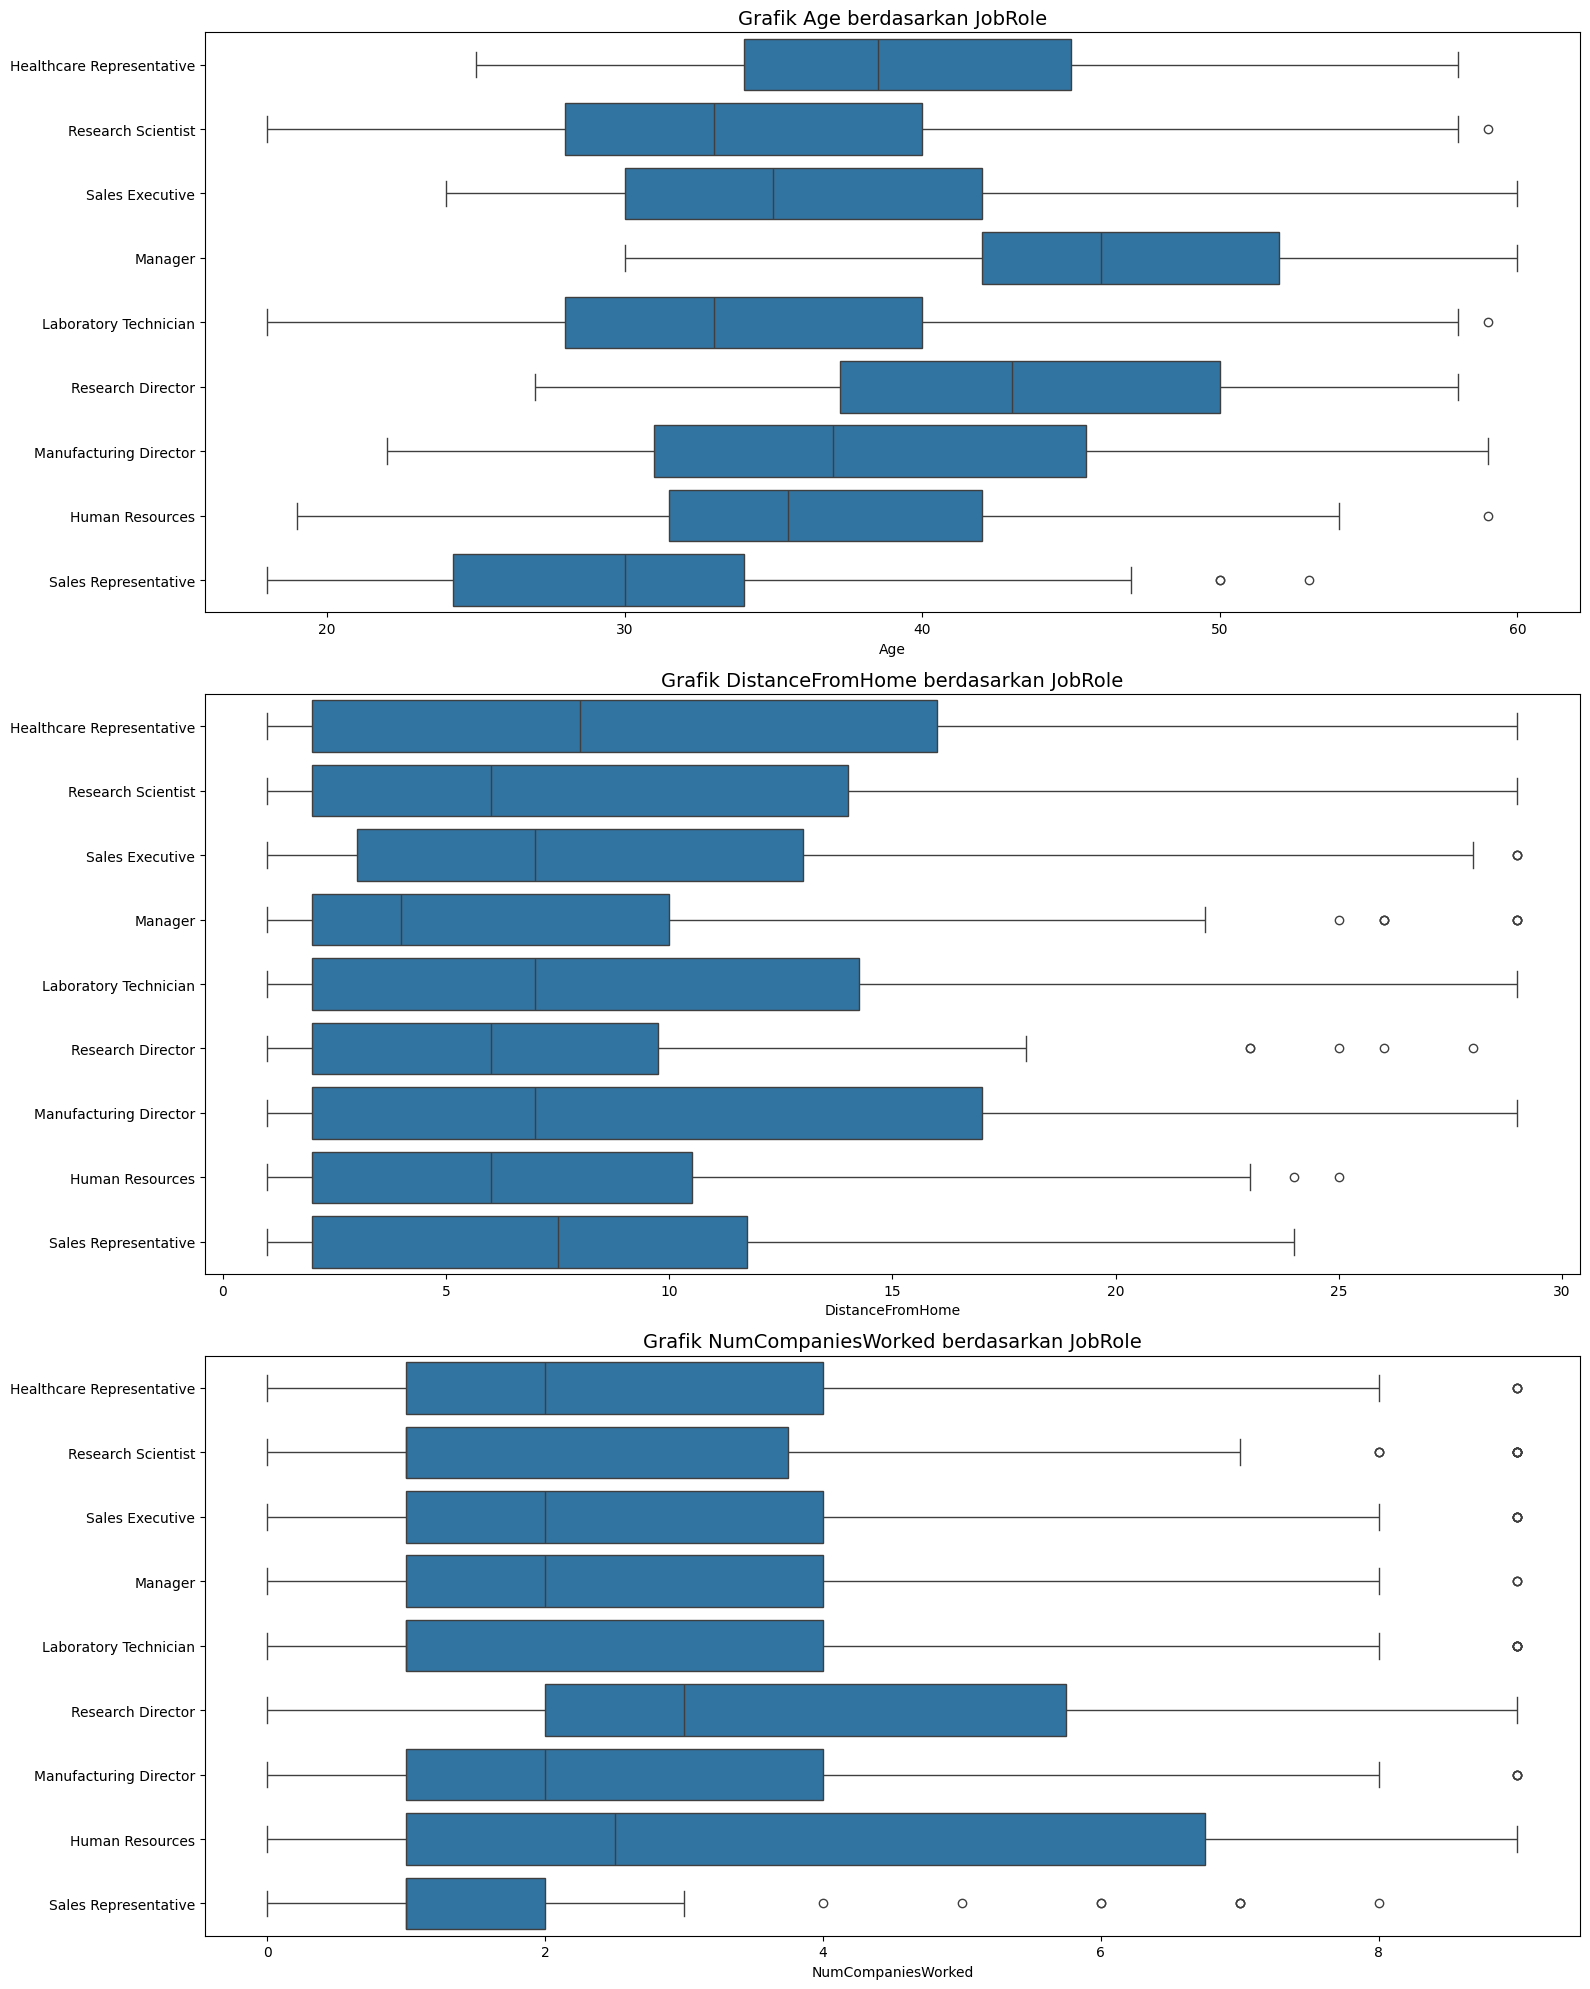

In [27]:
# 1. Fungsi untuk menggambarkan distribusi fitur numerik berdasarkan JobRole
numerical_dis_plot(
    features=["Age", "DistanceFromHome", "NumCompaniesWorked"],
    df=main_df,
    segment_feature="JobRole"
)

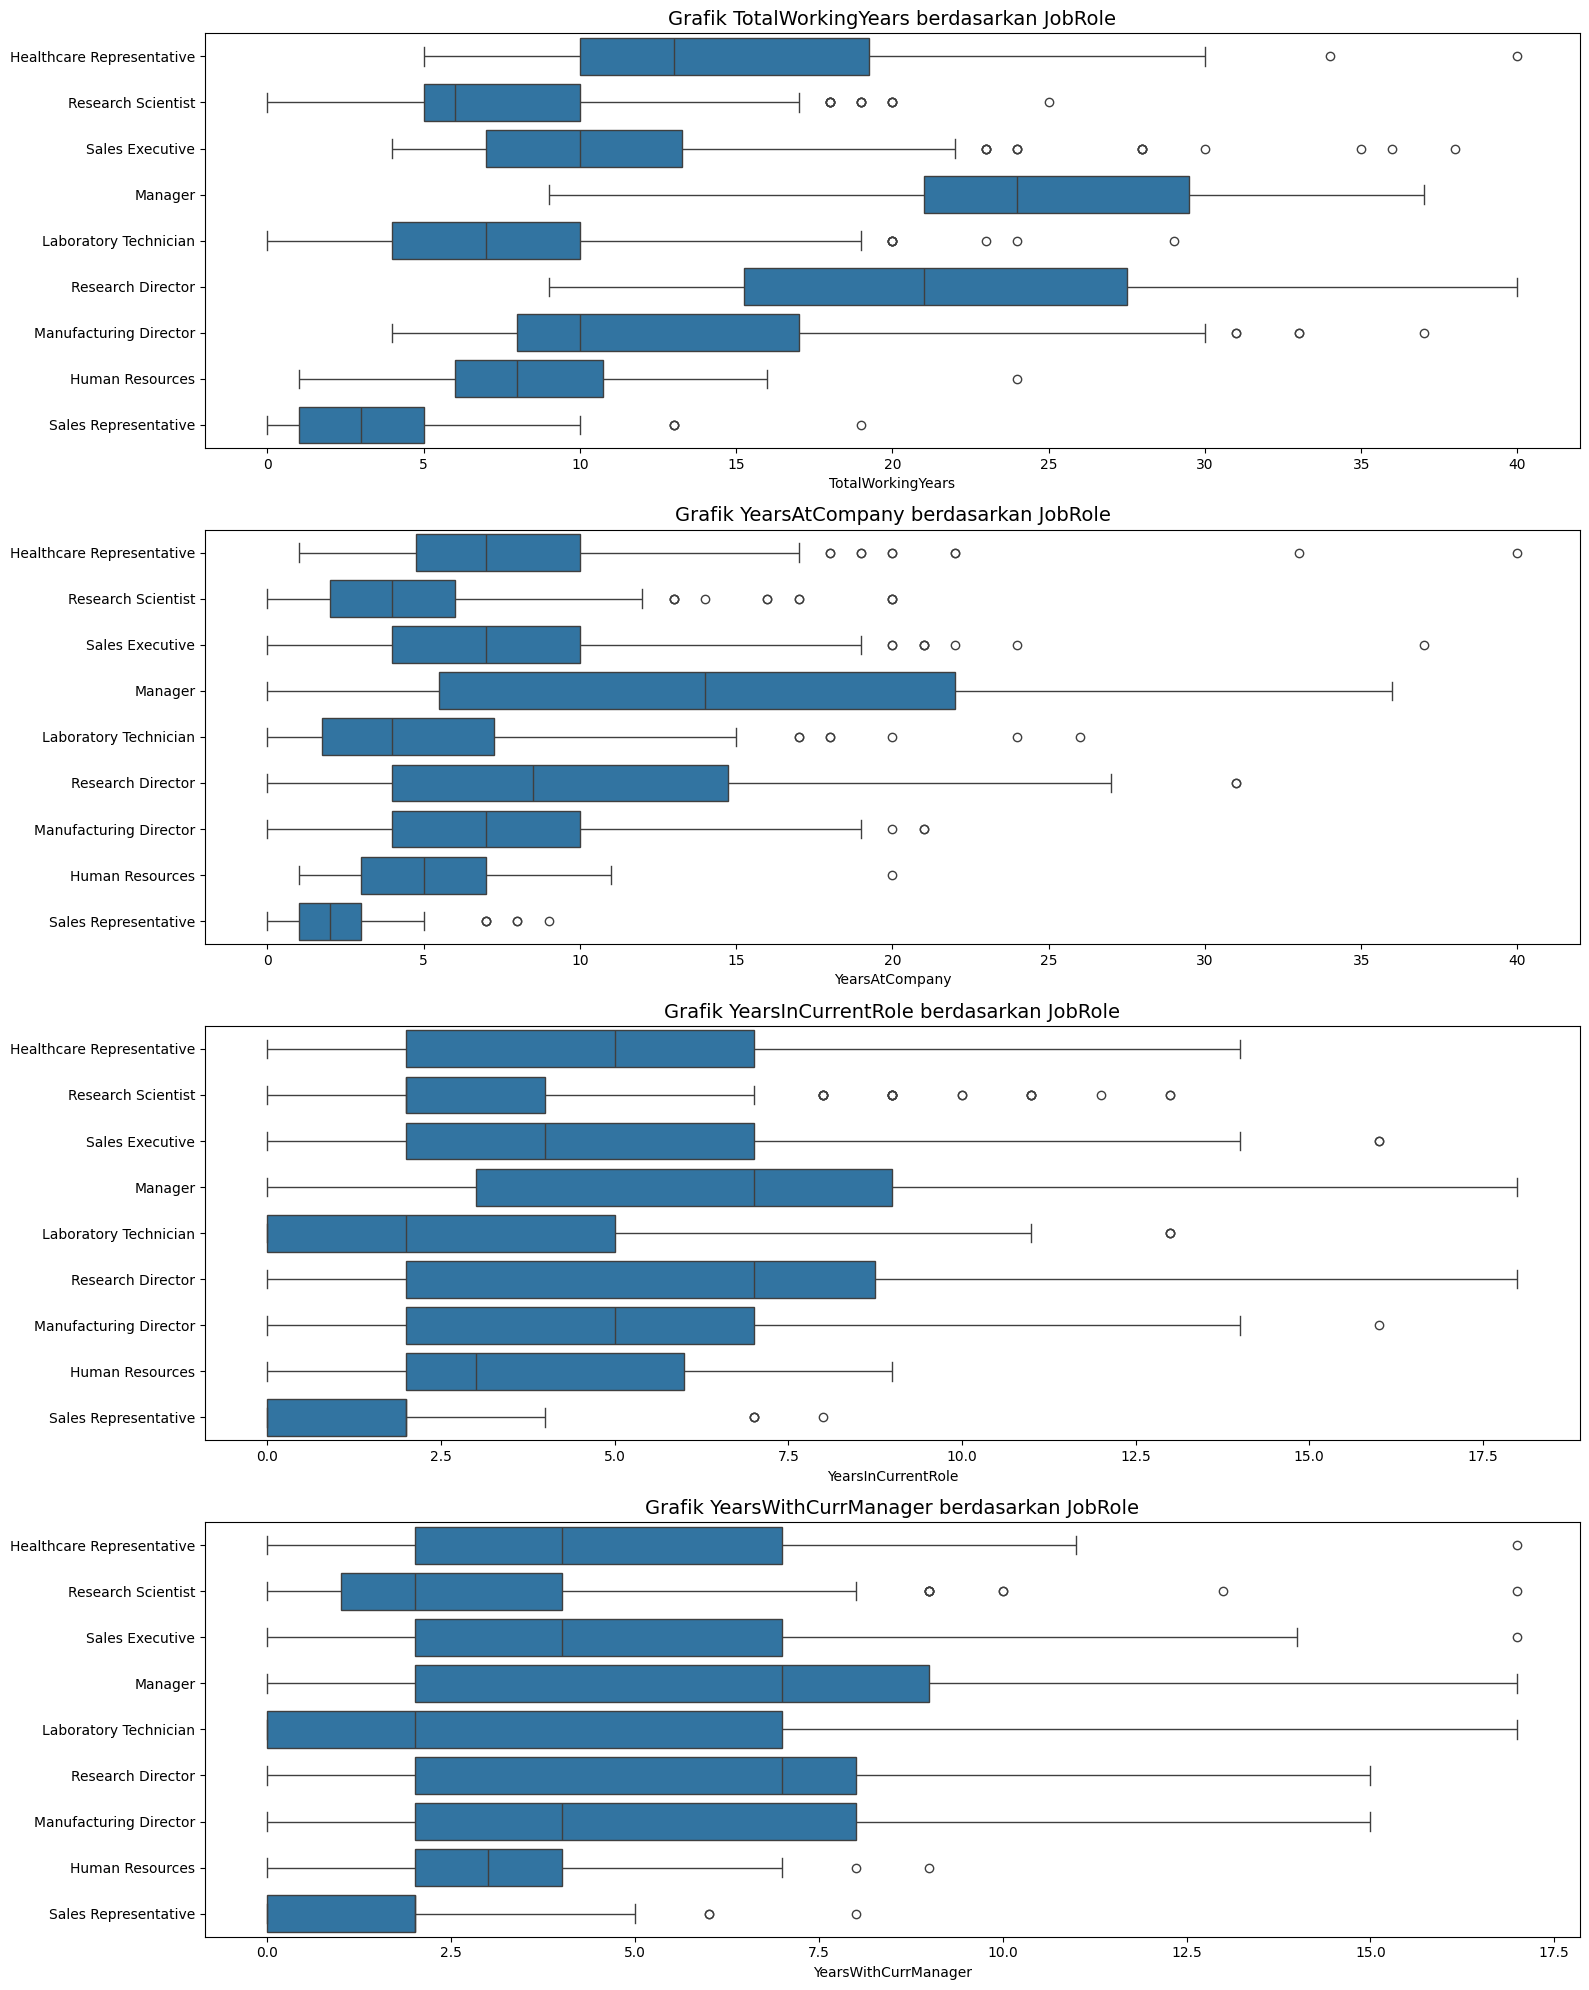

In [28]:
# 2. Fungsi untuk menggambarkan distribusi fitur numerik berdasarkan JobRole
numerical_dis_plot(
    features=["TotalWorkingYears", "YearsAtCompany", "YearsInCurrentRole", "YearsWithCurrManager"],
    df=main_df,
    segment_feature="JobRole"
)

#### Distribusi Fitur Kategorikal dari dataset

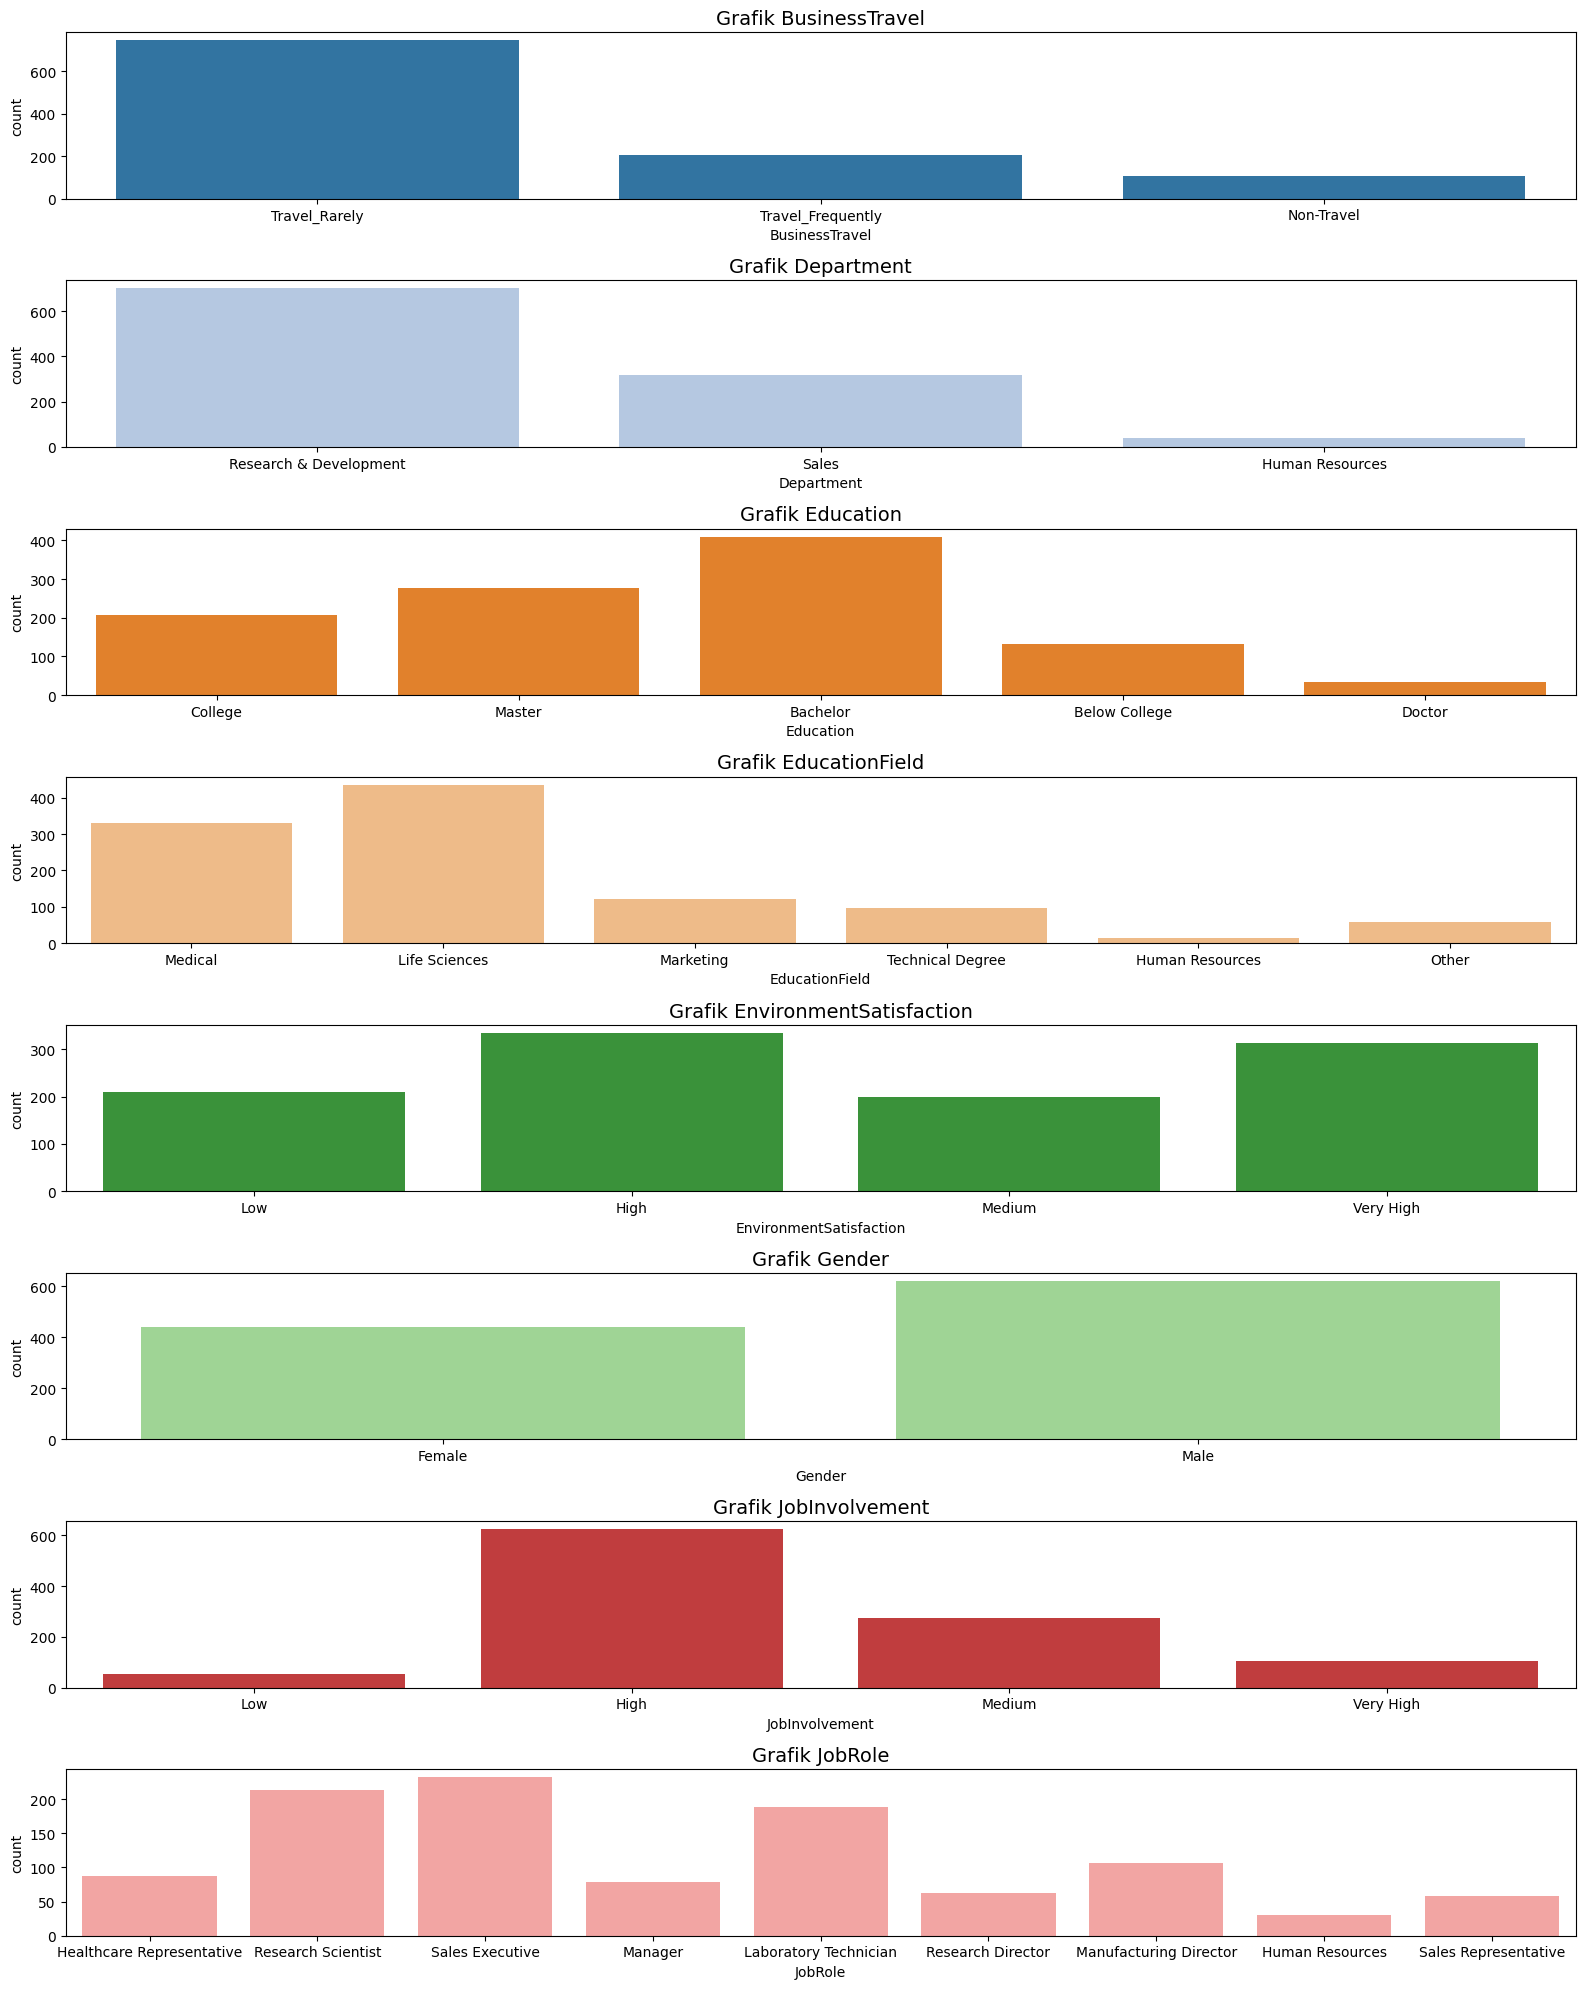

In [29]:
# Melihat distribusi fitur Kategorikal menggunakan grafik batang (bagian 1)

fitur_kategorikal = []

for fitur in main_df.columns:
  if main_df[fitur].dtype == "object":
     fitur_kategorikal.append(fitur)

fitur_kategorikal_1 = fitur_kategorikal[:8]

# Mendefenisikan jumlah dari grafik batang & jumlah grid-nya
num_bar_chart = len(fitur_kategorikal_1)
num_rows = 8
num_cols = 1

# Membuat figure & subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 20))
axes_flat = axes.flatten()

# Mengatur warna grafik batang
colors = plt.cm.tab20.colors[:num_bar_chart]

# Membuat setiap grafik batang dengan warna unik
for i, (column, ax) in enumerate(zip(fitur_kategorikal_1, axes_flat)):
  sns.countplot(data=main_df, x=column, color=colors[i], ax=ax)
  ax.set_title(f'Grafik {column}', fontsize = 14)
  ax.set_xlabel(column, fontsize = 10)

# Menampilkan grafik batang
plt.tight_layout()
plt.show()

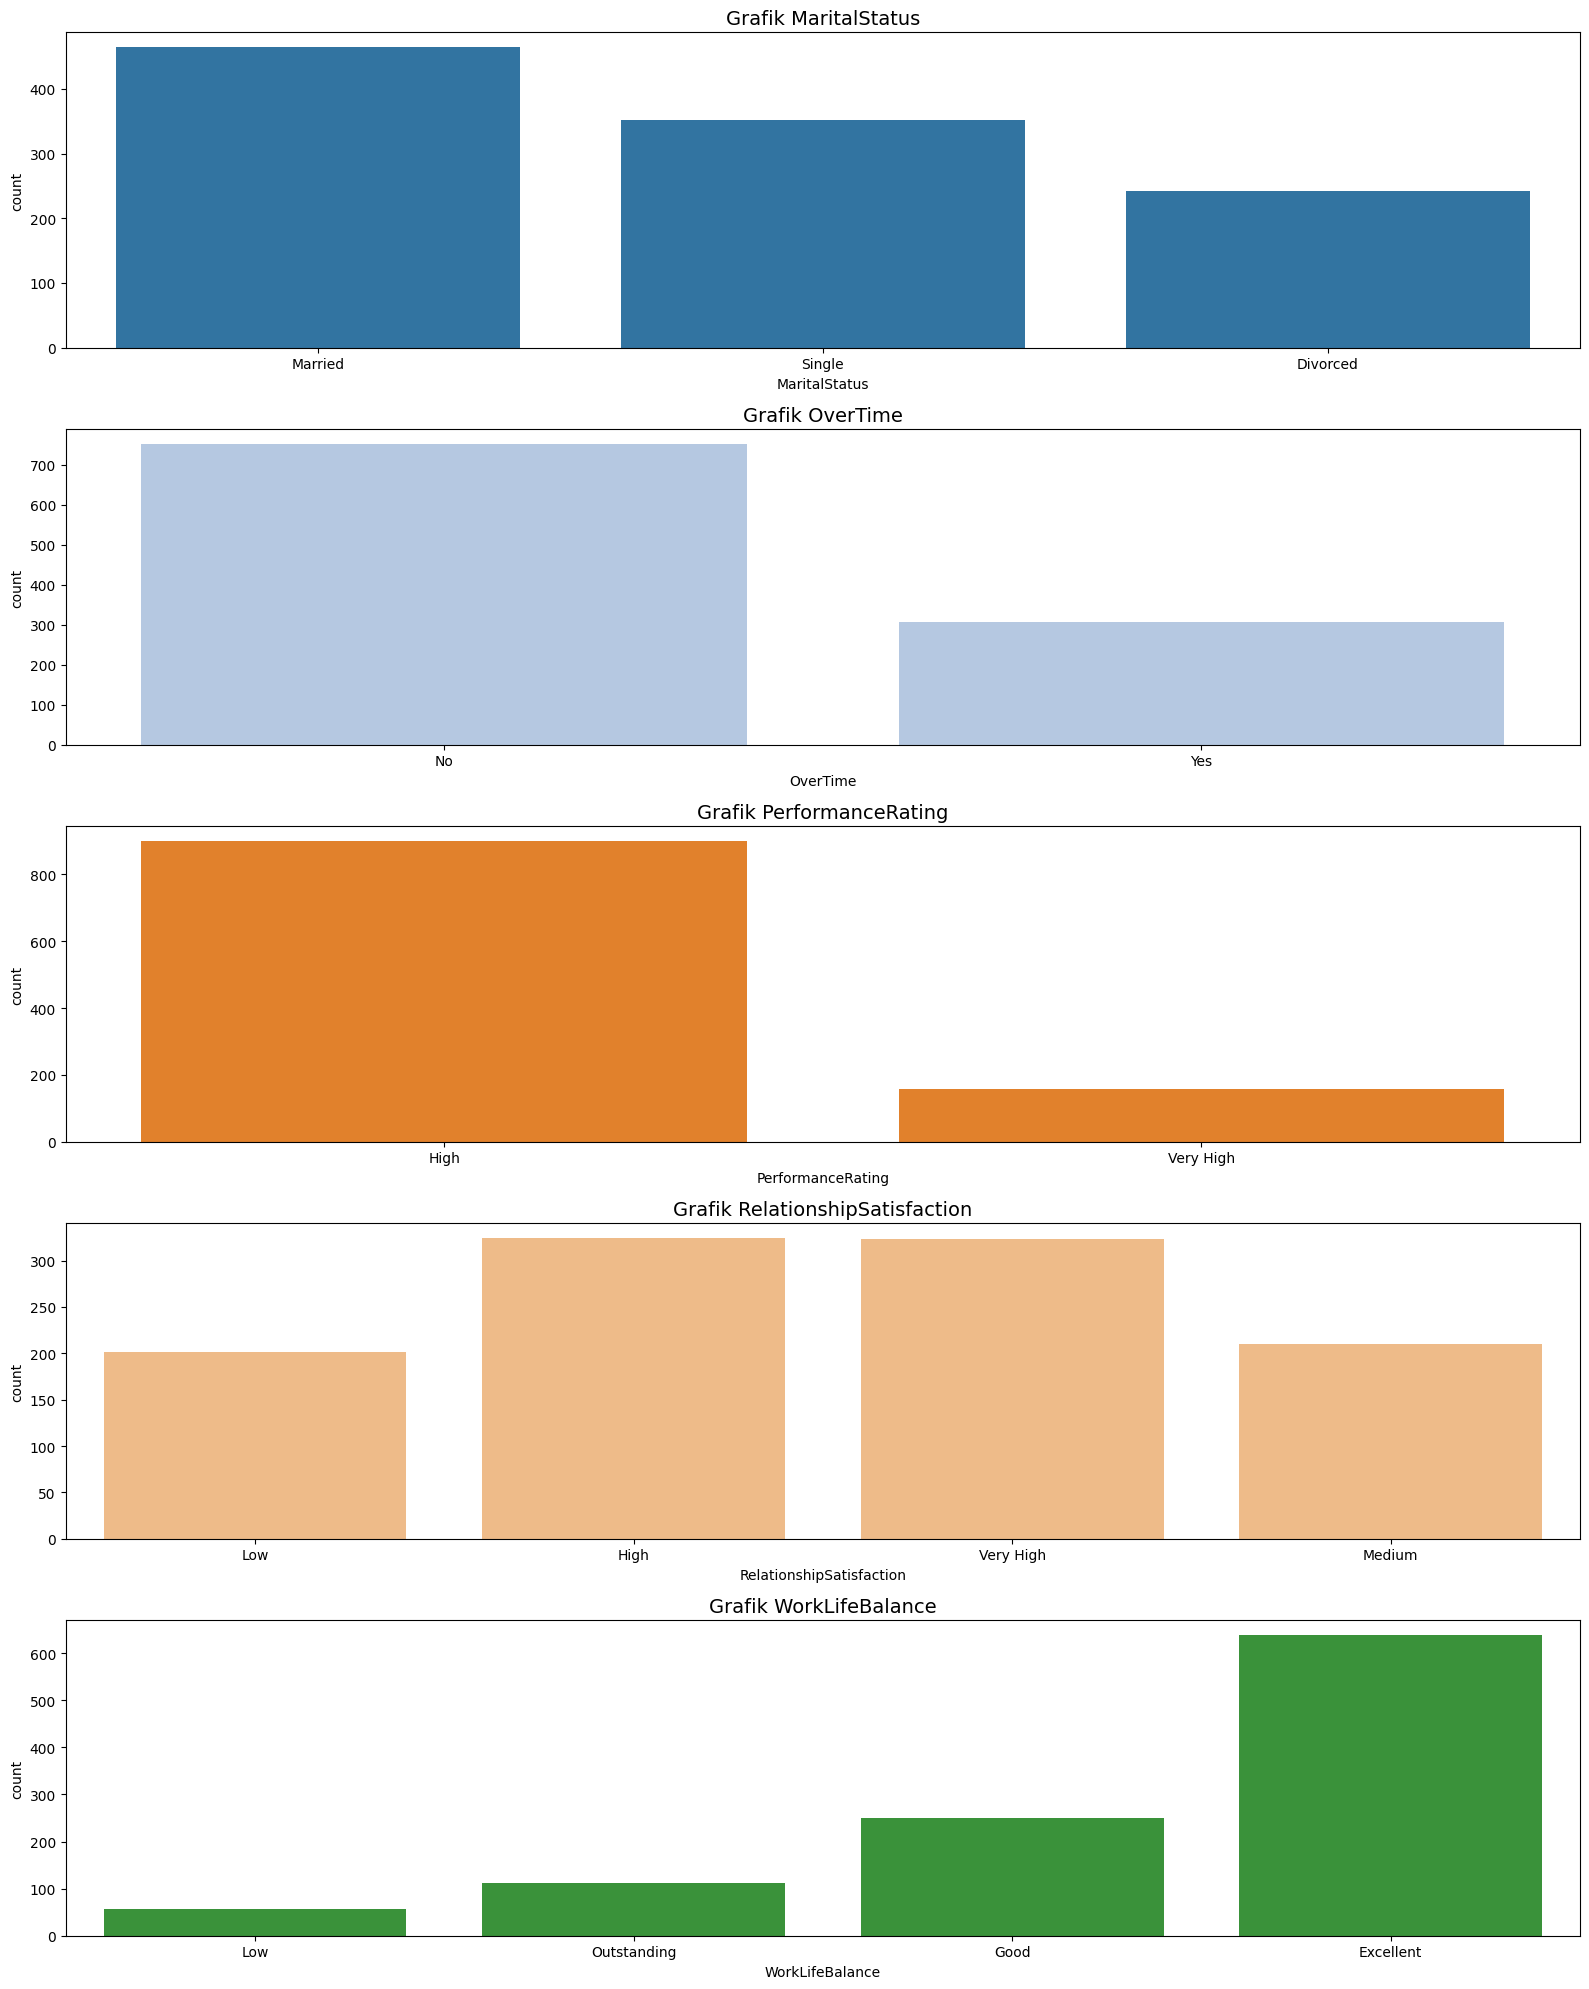

In [30]:
# Melihat distribusi fitur Kategorikal menggunakan grafik batang (bagian 2)

fitur_kategorikal_2 = fitur_kategorikal[9:]

# Mendefenisikan jumlah dari grafik batang & jumlah grid-nya
num_bar_chart = len(fitur_kategorikal_2)
num_rows = 5
num_cols = 1

# Membuat figure & subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 20))
axes_flat = axes.flatten()

# Mengatur warna grafik batang
colors = plt.cm.tab20.colors[:num_bar_chart]

# Membuat setiap grafik batang dengan warna unik
for i, (column, ax) in enumerate(zip(fitur_kategorikal_2, axes_flat)):
  sns.countplot(data=main_df, x=column, color=colors[i], ax=ax)
  ax.set_title(f'Grafik {column}', fontsize = 14)
  ax.set_xlabel(column, fontsize = 10)

# Menampilkan grafik batang
plt.tight_layout()
plt.show()

Anda dapat melihat berdasarkan grafik diatas dapat dikatakan bahwa:
* Jumlah karyawan laki-laki lebih banyak dibanding karyawan perempuan
* Jumlah Karyawan terbanyak berasal dari dari department Research & Development.
* Banyak karyawan yang memiliki latar belakang pendidikan sebagai sarjana (bachelor).
* Kebanyakan karyawan berasal dari bidang pendidikan *life science*
* Paling banyak karyawan yang memiliki peran pekerjaan sebagai eksekutif sales
* Jumlah karyawan yang tidak lembur lebih banyak dibandingkan dengan karyawan yang tidak lembur.
* Kebanyakan karyawan yang tidak sering melakukan perjalanan bisnis (Travel Rarely)
* Kebanyakan karyawan memiliki status sudah menikah
* Umumnya karyawan memiliki kepuasan yang tinggi terhadap lingkungan kerja, relasi dalam berkerja yang tinggi, Banyak terlibat dalam pekerjaan dan memiliki performa kerja yang tinggi
* Kebanyakan karyawan memiliki keseimbangan kehidupan dengan pekerjaan yang sangat baik



#### Distribusi Fitur Kategorikal berdasarkan Fitur Kategorikal yang lain

In [31]:
# Membuat sebuah helper function bernama categorical_plot
def categorical_plot(features, df, segment_feature=None):
    fig, ax = plt.subplots(len(features), 1,figsize=(16,20))
    for i, feature in enumerate(features):
        if segment_feature:
            sns.countplot(data=df, x=segment_feature, hue=feature, ax=ax[i])
            ax[i].set_title(f'Grafik {feature} berdasarkan {segment_feature}', fontsize = 14)
            ax[i].set_xlabel(segment_feature, fontsize = 10)
        else:
            sns.countplot(data=df, x=feature, ax=ax[i])
    plt.tight_layout()
    plt.show()

##### Distribusi Fitur Kategorikal berdasarkan Fitur JobRole

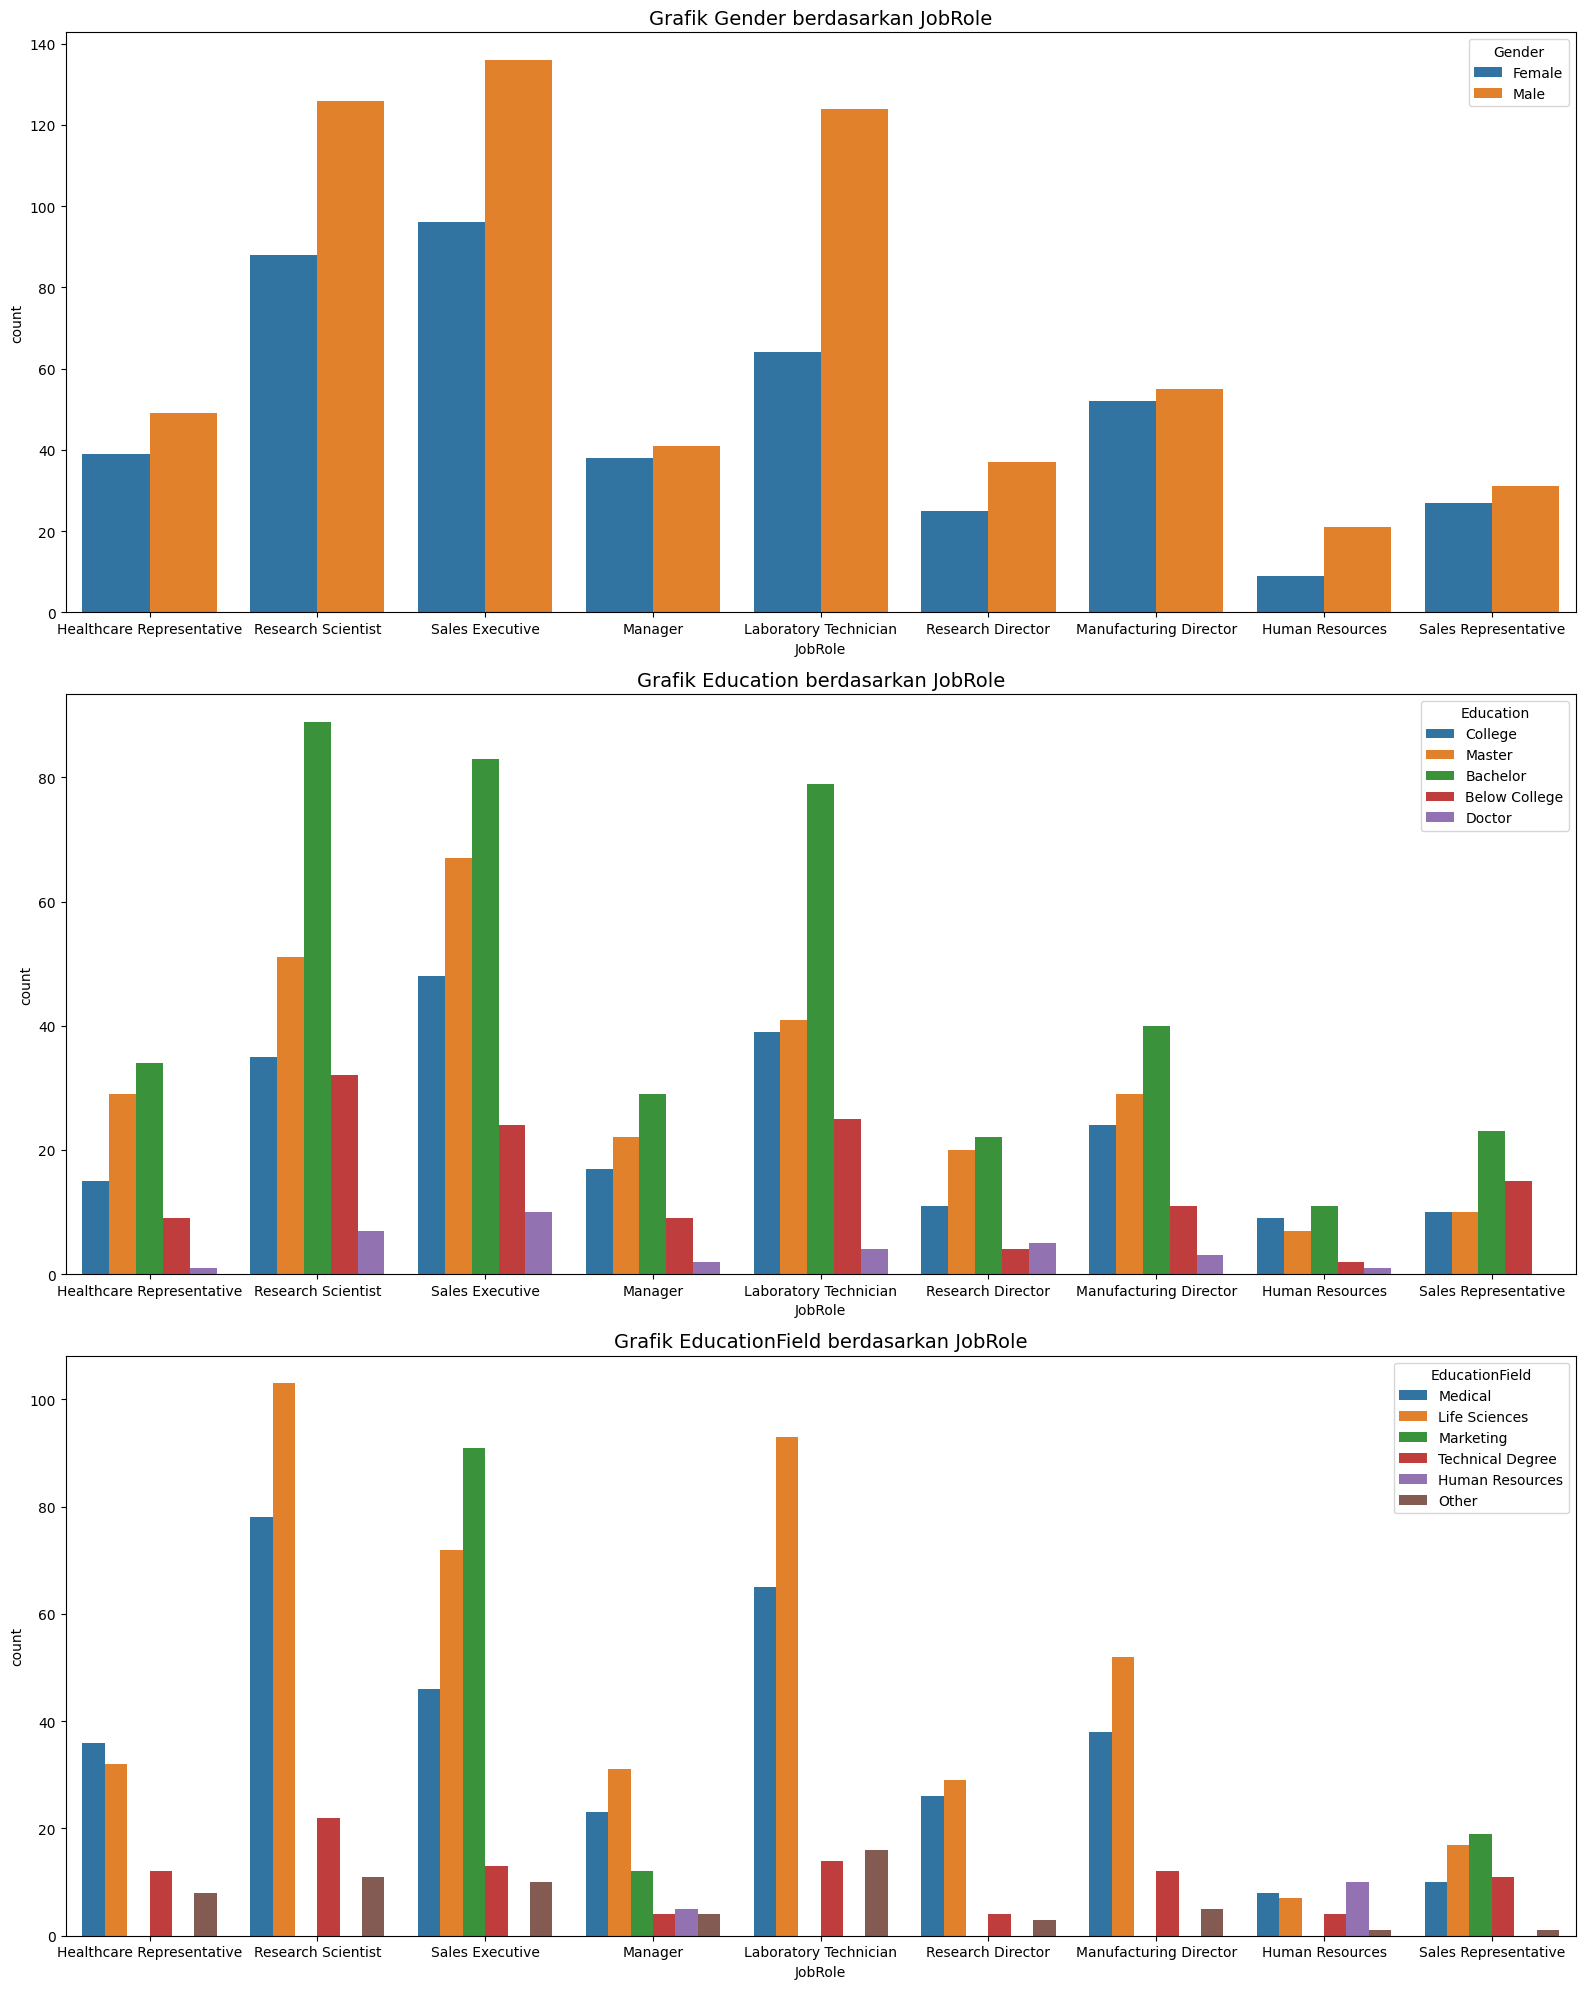

In [32]:
# 1. fungsi untuk menggambarkan distribusi fitur kategorikal berdasarkan JobRole
categorical_plot(
    features=["Gender", "Education", "EducationField"],
    df=main_df,
    segment_feature="JobRole"
)

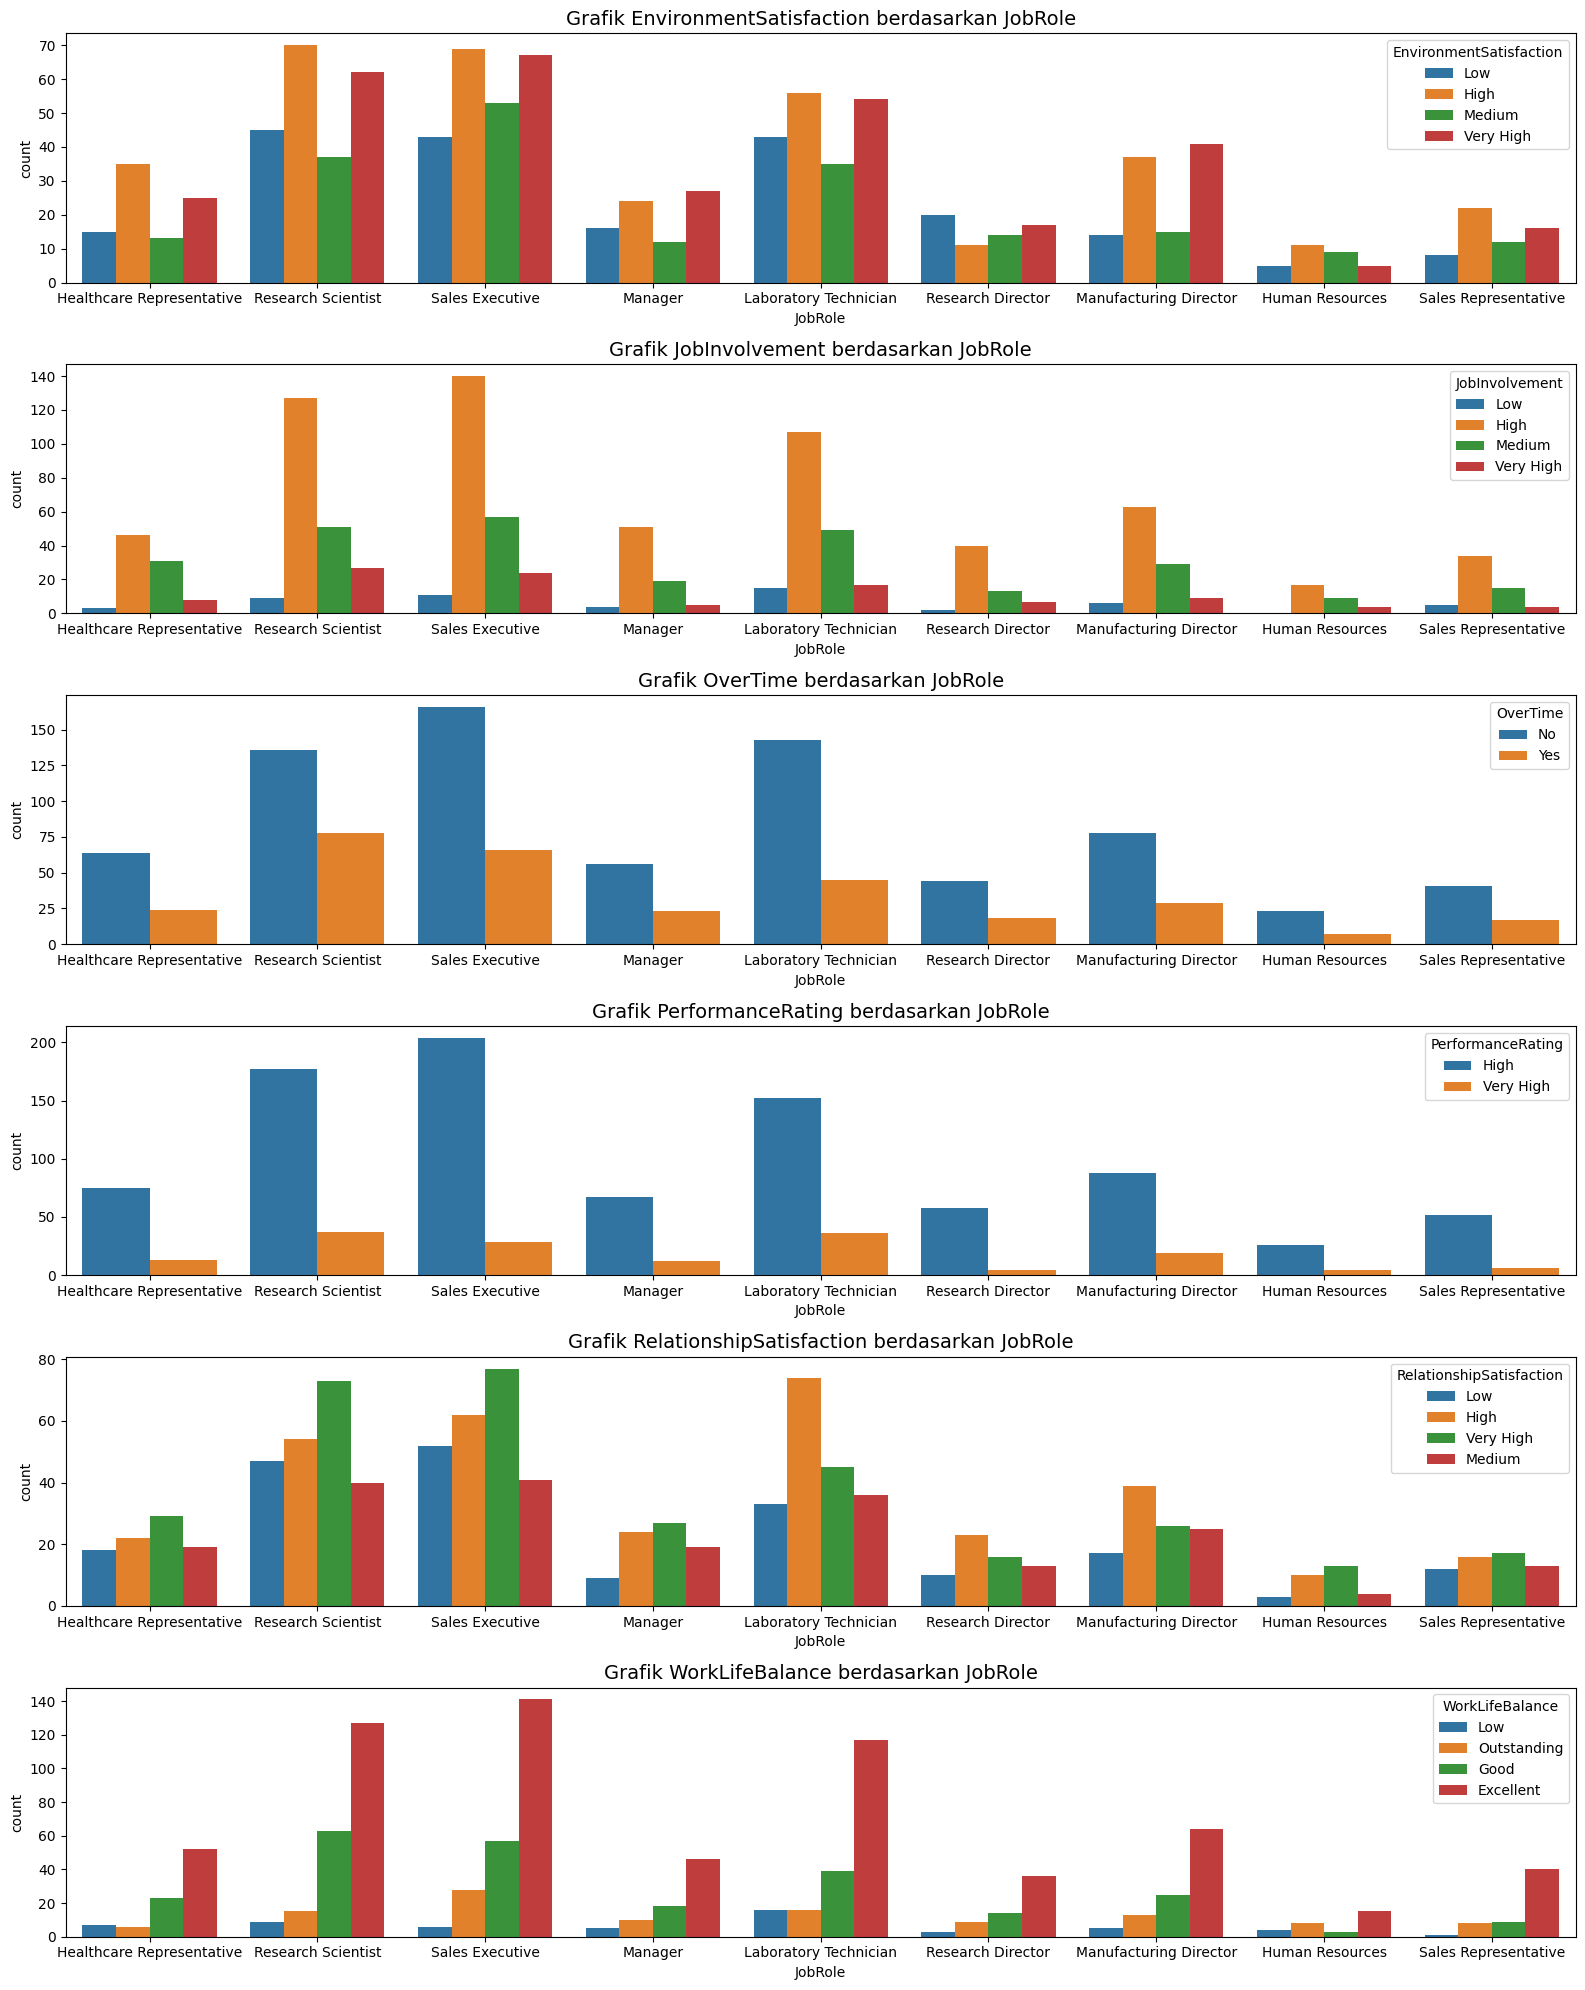

In [33]:
# 2. fungsi untuk menggambarkan distribusi fitur kategorikal berdasarkan JobRole
categorical_plot(
    features=["EnvironmentSatisfaction","JobInvolvement","OverTime","PerformanceRating","RelationshipSatisfaction","WorkLifeBalance"],
    df=main_df,
    segment_feature="JobRole"
)

##### Distribusi Fitur Kategorikal berdasarkan Fitur Department

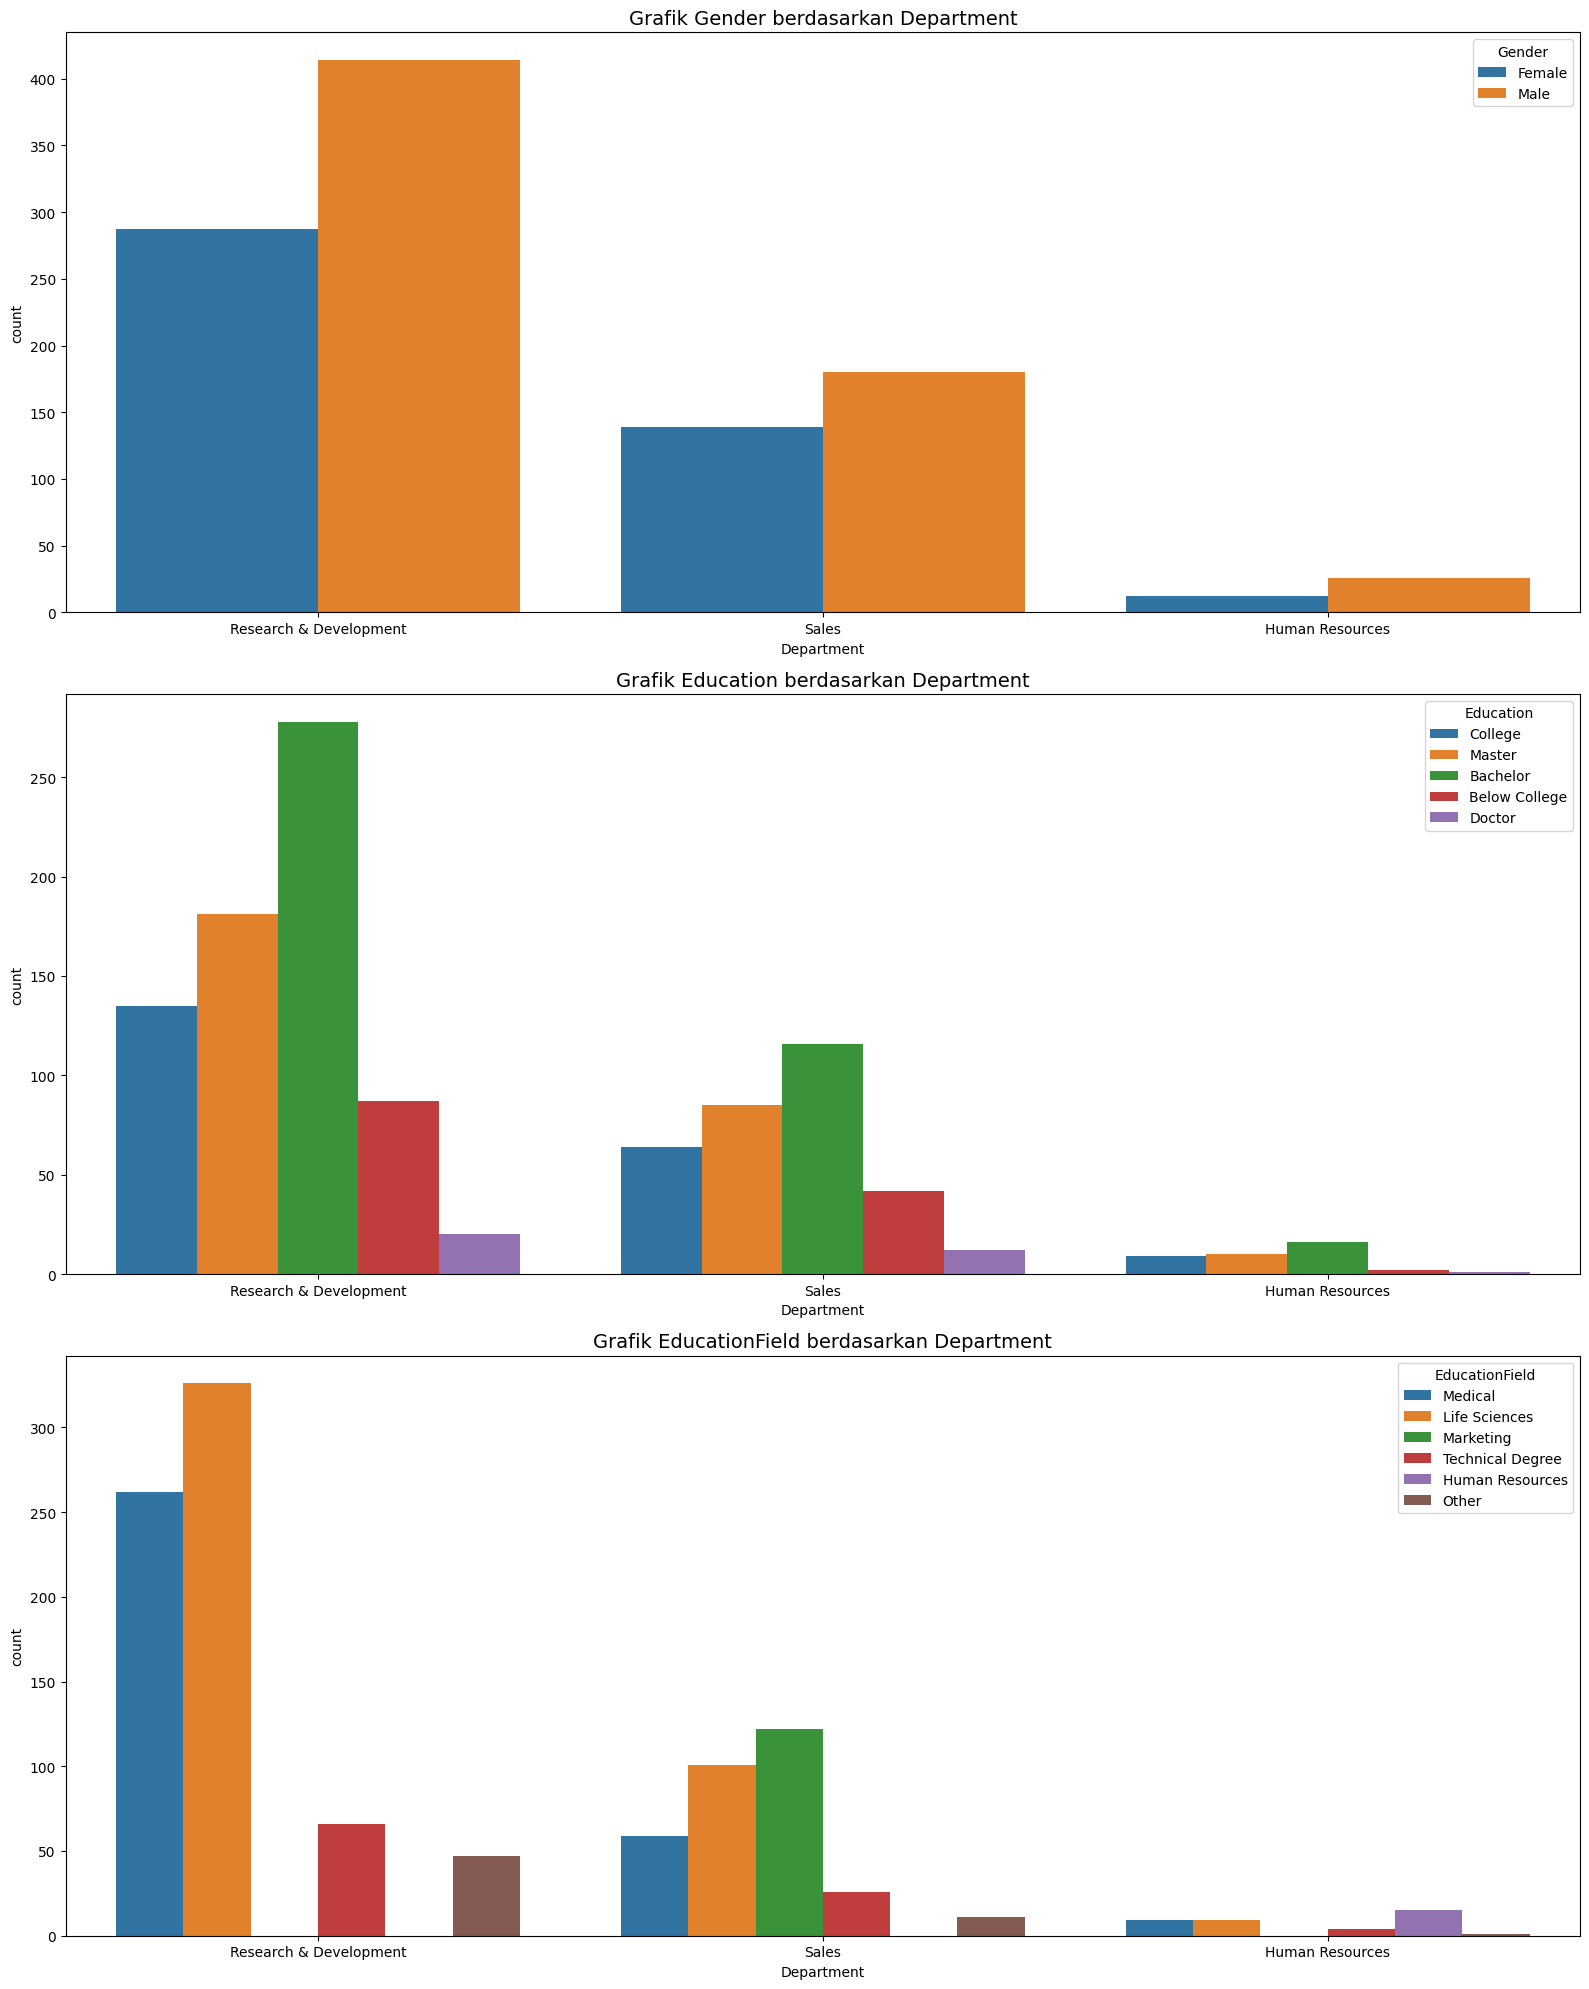

In [34]:
# 1. fungsi untuk menggambarkan distribusi fitur kategorikal berdasarkan Department
categorical_plot(
    features=["Gender", "Education", "EducationField"],
    df=main_df,
    segment_feature="Department"
)

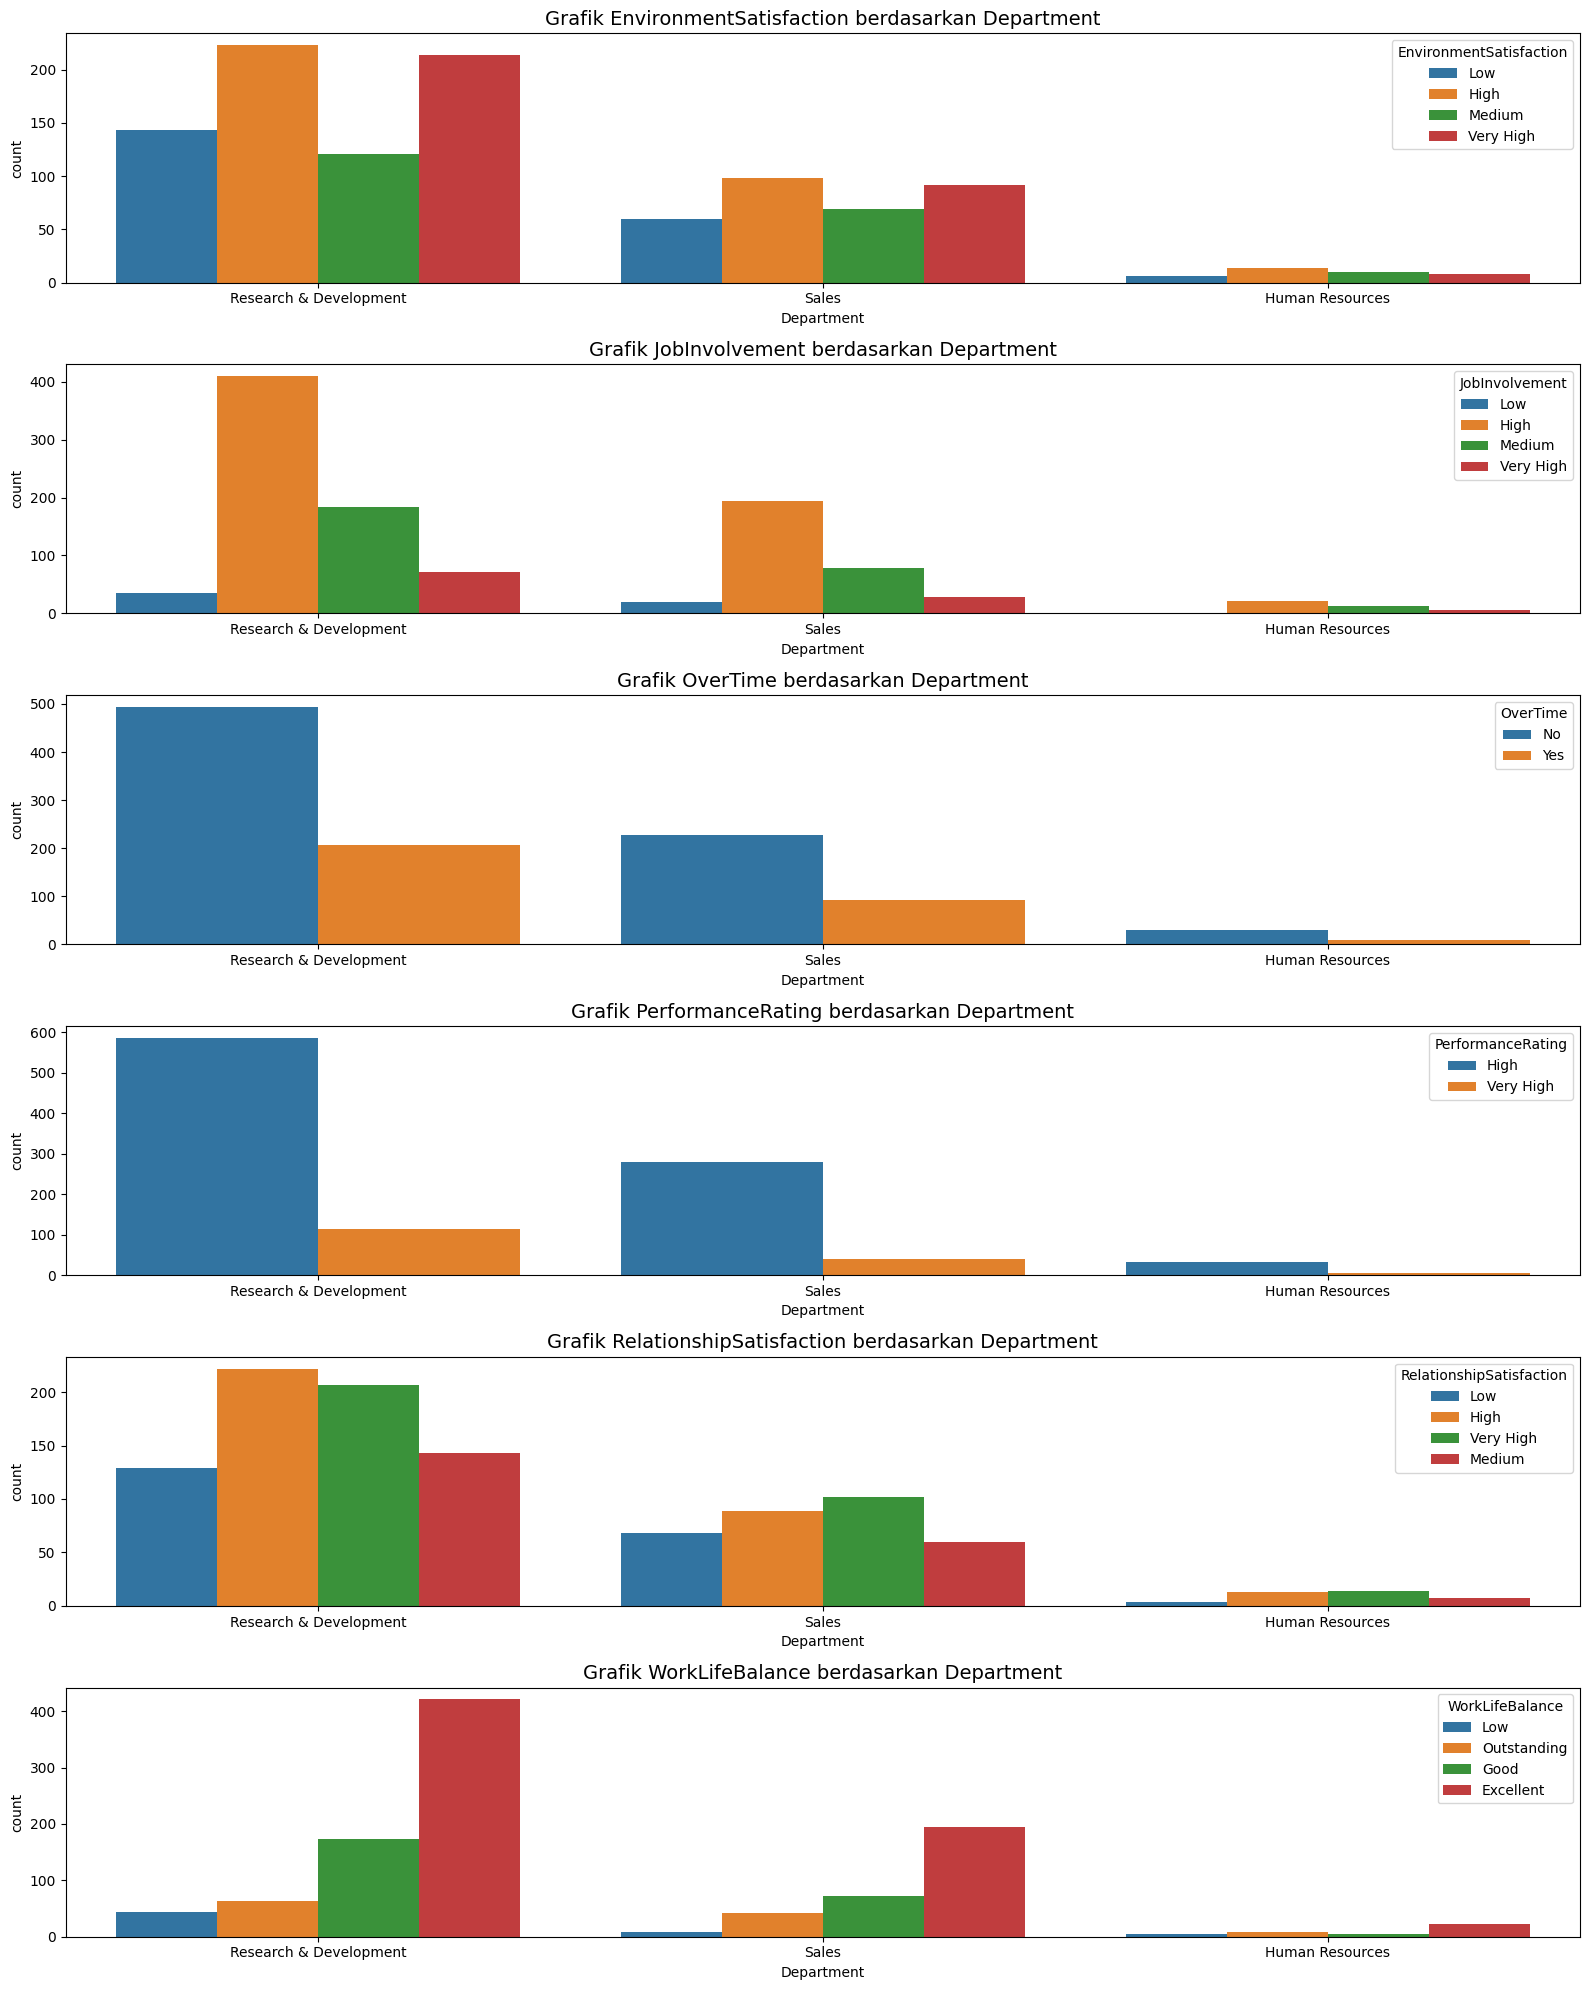

In [35]:
# 2. fungsi untuk menggambarkan distribusi fitur kategorikal berdasarkan Department
categorical_plot(
    features=["EnvironmentSatisfaction","JobInvolvement","OverTime","PerformanceRating","RelationshipSatisfaction","WorkLifeBalance"],
    df=main_df,
    segment_feature="Department"
)

##### Distribusi Fitur Kategorikal berdasarkan Fitur Business Travel

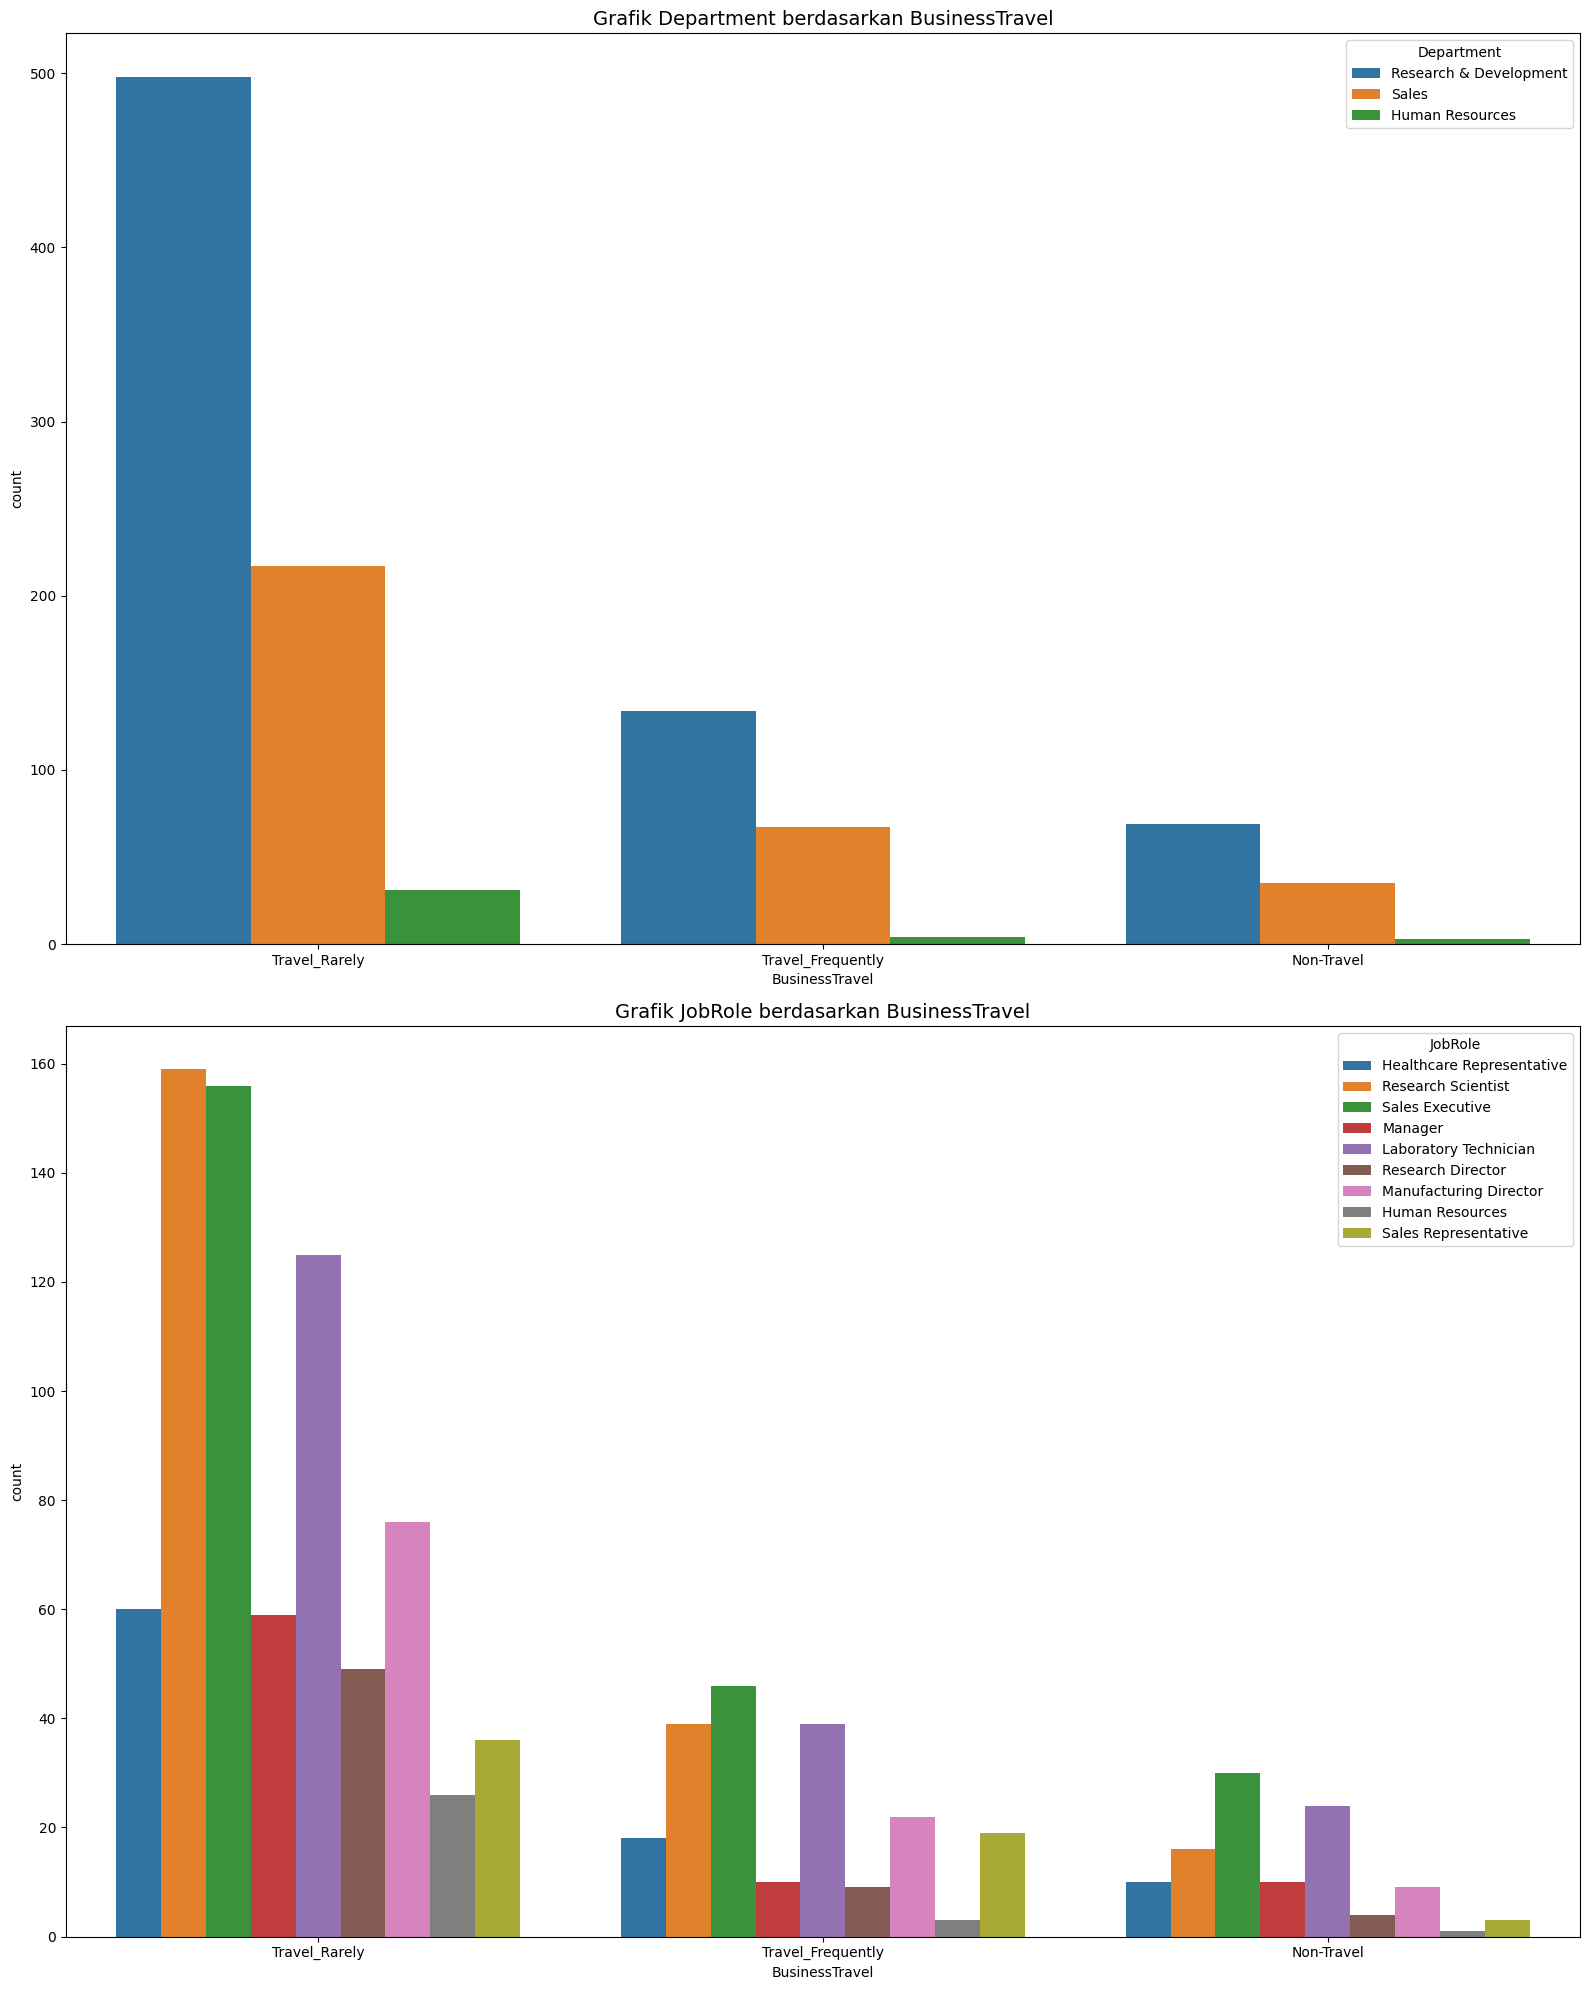

In [36]:
# fungsi untuk menggambarkan distribusi fitur kategorikal berdasarkan BusinessTravel
categorical_plot(
    features=["Department", "JobRole"],
    df=main_df,
    segment_feature="BusinessTravel"
)

#### Perbandingan fitur Attrition dengan fitur yang lain

0    879
1    179
Name: Attrition, dtype: int64
0    0.830813
1    0.169187
Name: Attrition, dtype: float64


Text(0.5, 1.0, 'Attrition')

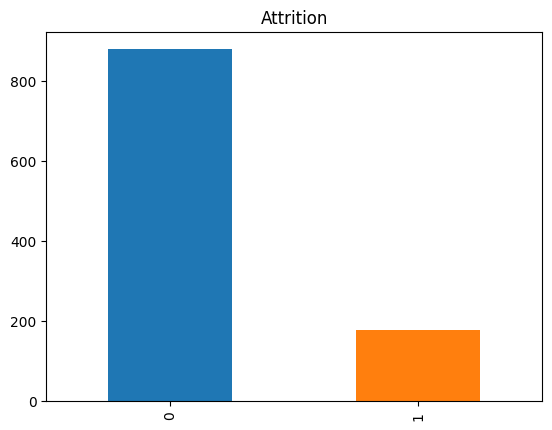

In [37]:
# Cek Proporsi fitur Attrition
print(main_df.Attrition.value_counts())
print(main_df.Attrition.value_counts(normalize=True))
attrition_plot = main_df['Attrition'].value_counts()
attrition_plot.plot(kind='bar', color=('C0','C1')).set_title('Attrition')

Terlihat pada grafik, bahwa jumlah data (karyawan) yang tergolong "0" atau "no attrition" lebih banyak dibandingkan jumlah data yang tergolong "1" atau "attrition". Sehingga, dapat dikatakan bahwa populasi data tidak seimbang atau data imbalanced.

In [38]:
# Membuat dataframe baru untuk perbandingan fitur Attrition dengan fitur yang lain

# membuat dataframe baru
attrition_df = main_df.loc[:, ["Attrition", "DistanceFromHome", "YearsWithCurrManager", "TotalWorkingYears"]]

attrition_df["Attrition"] = attrition_df["Attrition"].apply(lambda x: "Karyawan Beratahan" if x == "0" else "Karyawan Keluar" )

attrition_df.head()

,Attrition,DistanceFromHome,YearsWithCurrManager,TotalWorkingYears
1,Karyawan Keluar,11,0,15
2,Karyawan Keluar,4,7,18
3,Karyawan Keluar,26,8,23
6,Karyawan Keluar,1,2,6
7,Karyawan Keluar,2,4,24


In [39]:
# Helper Function untuk membuat grafik

# Fungsi untuk menggambarkan grafik line: 1 fitur kategorik dengan 1 fitur numerik
def fungsi_perbandingan_kategorik_numerik(feature, df, segment_feature):
    fig, ax = plt.subplots(figsize=(8,6))
    sns.kdeplot(data=df, x=feature, hue=segment_feature, multiple="stack")
    ax.set_title(f'Grafik {feature} berdasarkan {segment_feature}', fontsize = 14)
    ax.set_xlabel(segment_feature, fontsize = 10)
    plt.tight_layout()
    plt.show()

# Fungsi untuk menggambarkan grafik batang: 1 fitur kategorik dengan 1 fitur kategorik
def fungsi_perbandingan_kategorik(feature, df, segment_feature):
    fig, ax = plt.subplots(figsize=(8,6))
    sns.countplot(data=df, x=feature, hue=segment_feature)
    ax.set_title(f'Grafik {feature} berdasarkan {segment_feature}', fontsize = 14)
    ax.set_xlabel(segment_feature, fontsize = 10)
    plt.tight_layout()
    plt.show()

##### Perbandingan fitur Attrition dengan fitur distancefromehome

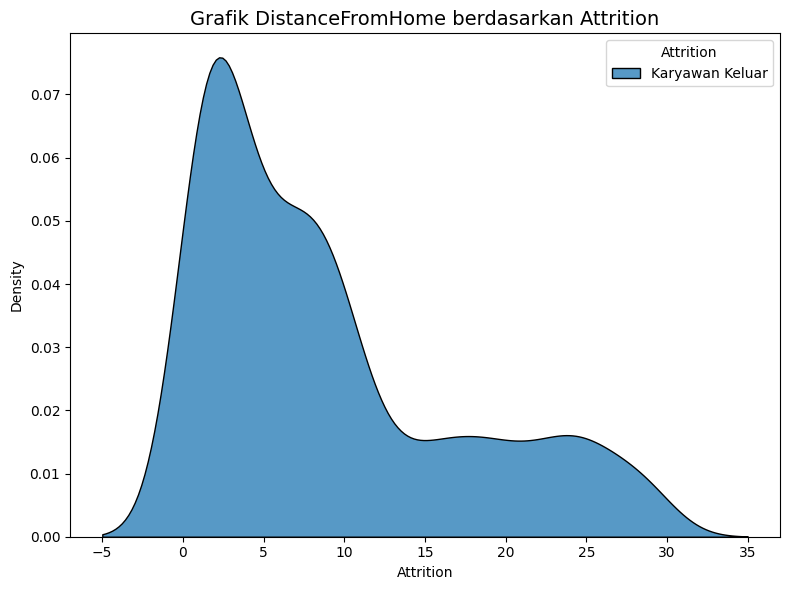

In [40]:
# Fungsi untuk menggambarkan grafik hubungan attrition dengan distancefromhome
fungsi_perbandingan_kategorik_numerik(
        feature="DistanceFromHome",
        df=attrition_df,
        segment_feature="Attrition"
)

Secara keseluruhan berapapun jaraknya, kecenderungan karyawan untuk keluar lebih besar dibandingkan karyawan bertahan. Namun, karyawan yang memiliki jarak rumah ke tempat kerja < 15 km umumnya lebih banyak yang keluar dari perusahaan dibandingkan karyawan yang tinggal > 15 km dari tempat kerja.  

##### Perbandingan fitur Attrition dengan fitur YearsWithCurrManager

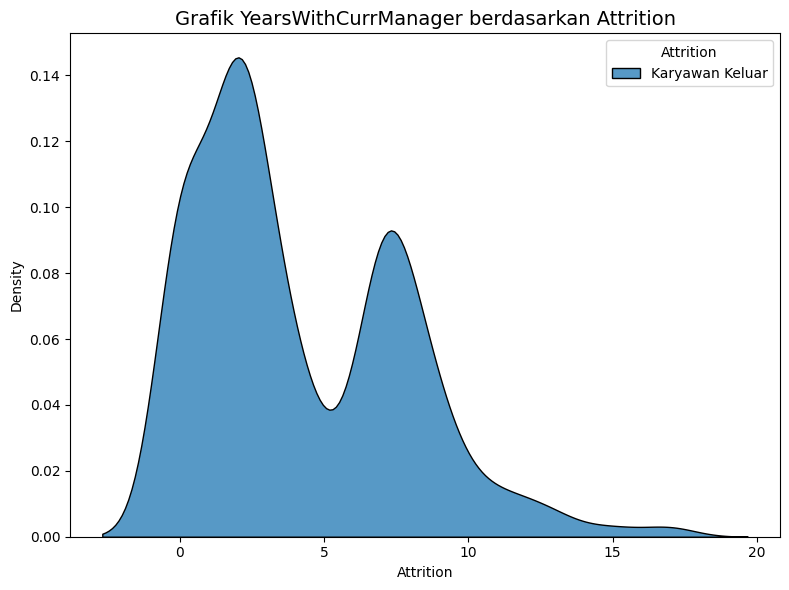

In [41]:
# Fungsi untuk menggambarkan grafik hubungan attrition dengan YearsWithCurrManager
fungsi_perbandingan_kategorik_numerik(
        feature="YearsWithCurrManager",
        df=attrition_df,
        segment_feature="Attrition"
)

Semakin lama jangka waktu karyawan bekerja bersama dengan manajer maka semakin kecil karyawan untuk keluar dari perusahaan

##### Perbandingan fitur Attrition dengan fitur totalworkingyears

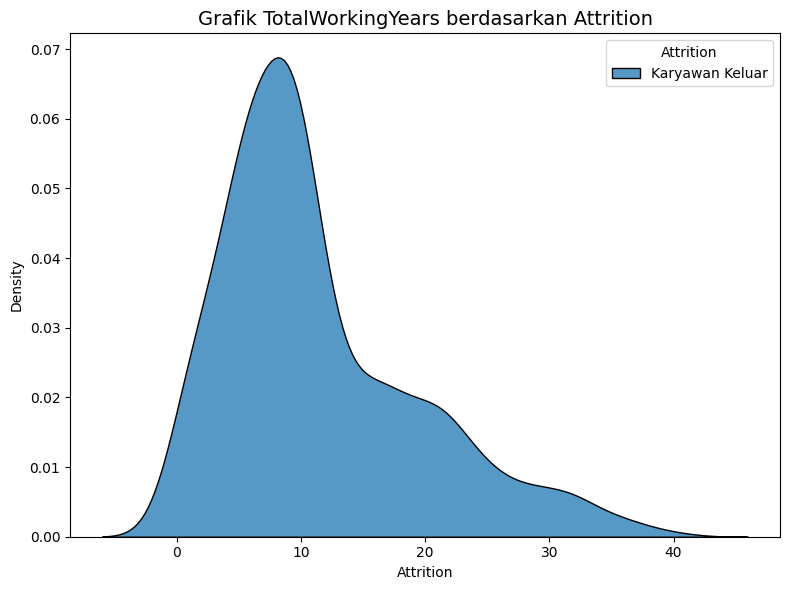

In [42]:
# Fungsi untuk menggambarkan grafik hubungan attrition dengan TotalWorkingYears
fungsi_perbandingan_kategorik_numerik(
        feature="TotalWorkingYears",
        df=attrition_df,
        segment_feature="Attrition"
)

Karyawan yang memiliki total tahun bekerja < 10 tahun memiliki kecenderungan untuk keluar dari perusahaan lebih besar dibandingkan dengan karyawan yang telah memiliki total tahun bekerja lebih dari 10 tahun

##### Perbandingan fitur Attrition dengan fitur Age

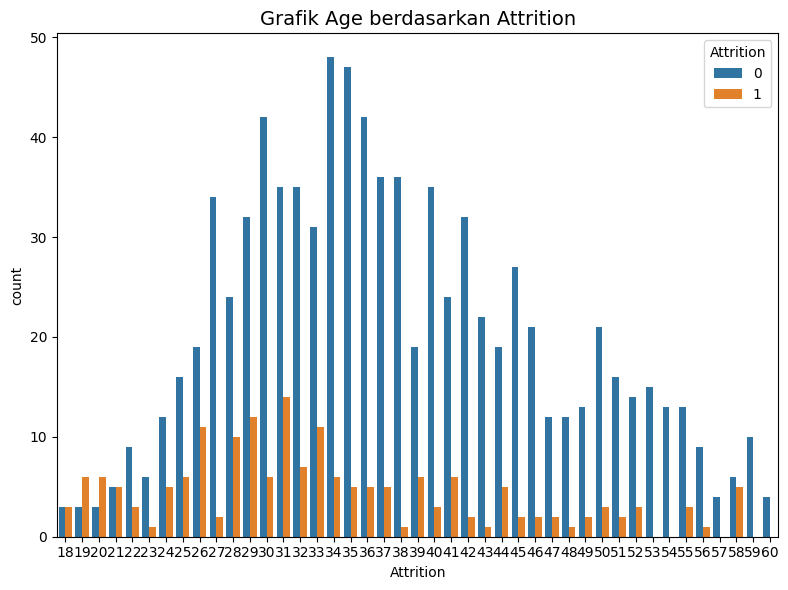

In [43]:
# fungsi untuk menggambarkan perbandingan fitur Age & Attrition

fungsi_perbandingan_kategorik(
        feature="Age",
        df=main_df,
        segment_feature="Attrition"
)

Berdasarkan usia dari karyawan, jumlah karyawan yang keluar dari perusahaan ketika berumur 19 dan 20 tahun lebih banyak dibandingkan yang bertahan di perusahaan. Sedangkan, kebanyakan karyawan yang berumur diatas 53 tahun memilih untuk tetap bertahan. Disisi lain, jumlah terbanyak karyawan yang keluar dari perusahaan adalah ketika berumur 31 tahun. Namun secara umum, lebih dominan karyawan yang bertahan di perusahaan dibandingkan yang keluar dari perusahaan.

##### Perbandingan fitur Attrition dengan fitur JobRole

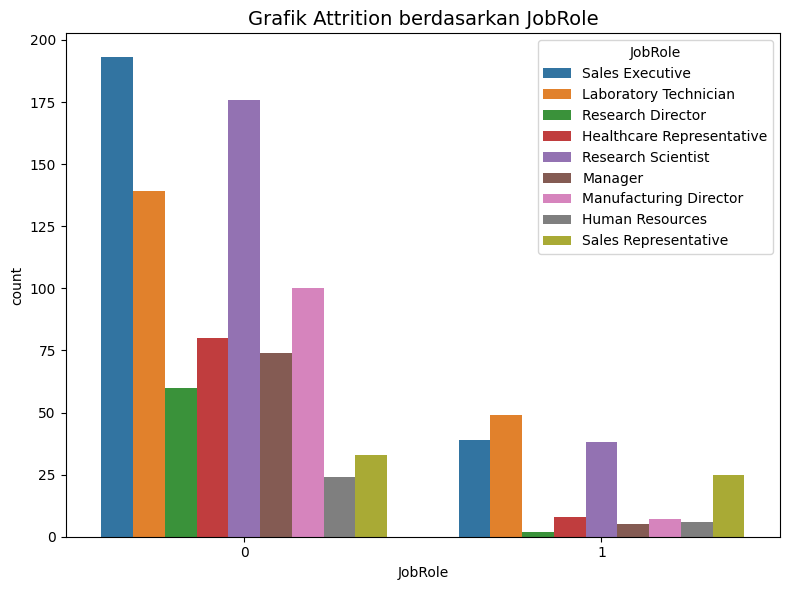

In [44]:
fungsi_perbandingan_kategorik(
        feature="Attrition",
        df=main_df,
        segment_feature="JobRole"
)

Berdasarkan peran di pekerjaan, jumlah karyawan yang paling banyak keluar dari perusahaan adalah yang memiliki peran Laboratory Technician, sedangkan jumlah karyawan yang paling sedikit adalah yang memiliki peran sebagai Research Director. Disisi lain, karyawan-karyawan yang berperan sebagai Sales Representative memiliki ratio attrition yang tinggi (kecenderungan untuk keluar yang lebih besar).  

##### Perbandingan fitur Attrition dengan fitur JobInvolvement

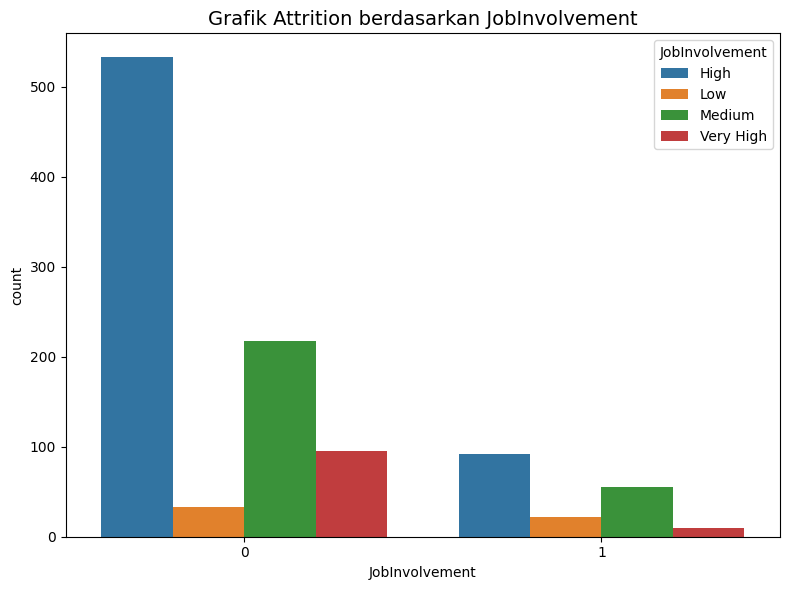

In [45]:
fungsi_perbandingan_kategorik(
        feature="Attrition",
        df=main_df,
        segment_feature="JobInvolvement"
)

Dapat terlihat bahwa karyawan kurang / rendah dalam dilibatkan di pekerjaan memiliki kecenderungan untuk keluar dari perusahaan lebih besar. Hal tersebut terlihat pada kategori Low yang mana nilai attrition yang hampir mendekati populasi keseluruhan.

##### Perbandingan fitur Attrition dengan fitur Job Level

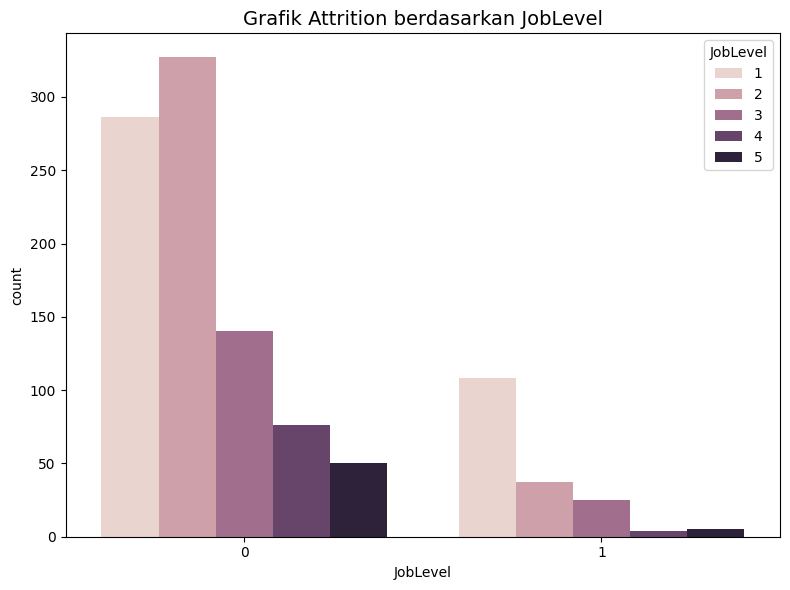

In [46]:
fungsi_perbandingan_kategorik(
        feature="Attrition",
        df=main_df,
        segment_feature="JobLevel"
)

Berdasakan tingkat level pekerjaan, semakin tinggi level pekerjaan maka kecenderungan karyawan untuk keluar dari perusahaan semakin kecil.

#### Perbandingan fitur MonthlyIncome dengan fitur yang lain

In [47]:
# Helper Function untuk membuat grafik


# Fungsi untuk menggambarkan grafik boxplot: 1 fitur kategorik dengan 1 fitur numerik
def fungsi_grafik_boxplot_1v1(feature, df, segment_feature, showfliers=True):
    fig, ax = plt.subplots(figsize=(10,6))
    sns.boxplot(y=segment_feature, x=feature, data=df, showfliers=showfliers)
    ax.set_title(f'Grafik {feature} berdasarkan {segment_feature}', fontsize = 14)
    ax.set_xlabel(segment_feature, fontsize = 10)
    plt.tight_layout()
    plt.show()

###### Perbandingan fitur MonthlyIncome dengan fitur Gender

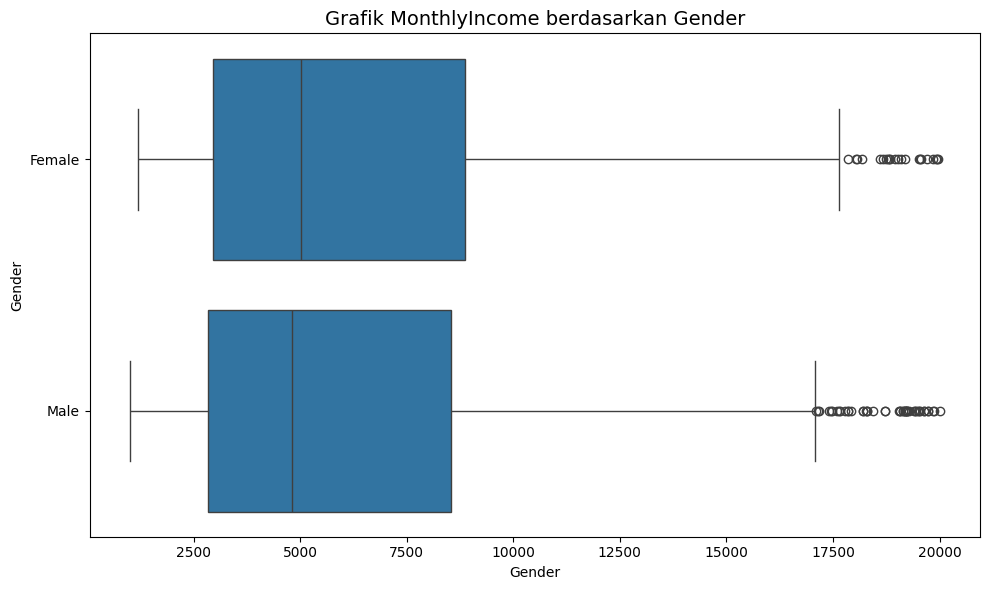

In [48]:
fungsi_grafik_boxplot_1v1(
    feature="MonthlyIncome",
    df=main_df,
    segment_feature="Gender"
)

Berdasarkan grafik dapat terlihat bahwa rata-rata gaji perbulan baik untuk Laki-laki dan perempuan tidaklah berbeda secara signifikan

##### Perbandingan fitur MonthlyIncome dengan fitur JobRole

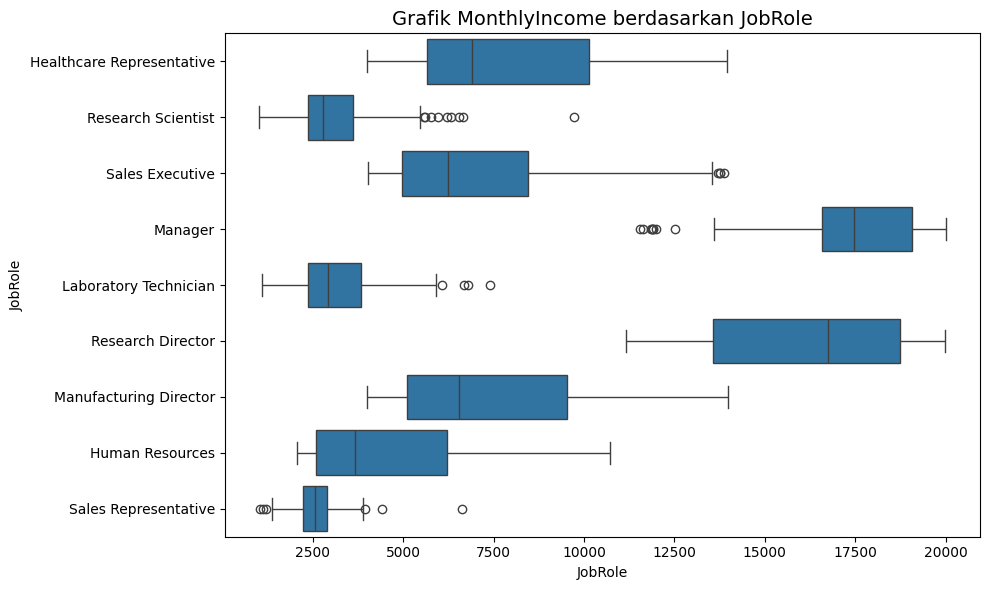

In [49]:
fungsi_grafik_boxplot_1v1(
    feature="MonthlyIncome",
    df=main_df,
    segment_feature="JobRole"
)

Peran pekerjaan sebagai Sales Representative memiliki pendapatan bulan terendah diikuti oleh peran Research Scientist dan Laboratory Technician. Sedangkan, peran pekerjaan sebagai Manajer dan Research Director yang memiliki pendapatan bulanan tertinggi.

## Data Preparation / Preprocessing

In [50]:
# Menampilkan dataset main_df
main_df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,2,37,1,Travel_Rarely,1141,Research & Development,11,College,Medical,Low,...,Low,80,0,15,2,Low,1,0,0,0
2,3,51,1,Travel_Rarely,1323,Research & Development,4,Master,Life Sciences,Low,...,High,80,3,18,2,Outstanding,10,0,2,7
3,4,42,0,Travel_Frequently,555,Sales,26,Bachelor,Marketing,High,...,Very High,80,1,23,2,Outstanding,20,4,4,8
6,7,40,0,Travel_Rarely,1124,Sales,1,College,Medical,Medium,...,High,80,3,6,2,Good,4,3,0,2
7,8,55,1,Travel_Rarely,725,Research & Development,2,Bachelor,Medical,Very High,...,Very High,80,1,24,2,Excellent,5,2,1,4


In [51]:
# Menampilkan info dataset
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1058 entries, 1 to 1469
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeId                1058 non-null   int64 
 1   Age                       1058 non-null   int64 
 2   Attrition                 1058 non-null   int64 
 3   BusinessTravel            1058 non-null   object
 4   DailyRate                 1058 non-null   int64 
 5   Department                1058 non-null   object
 6   DistanceFromHome          1058 non-null   int64 
 7   Education                 1058 non-null   object
 8   EducationField            1058 non-null   object
 9   EnvironmentSatisfaction   1058 non-null   object
 10  Gender                    1058 non-null   object
 11  HourlyRate                1058 non-null   int64 
 12  JobInvolvement            1058 non-null   object
 13  JobLevel                  1058 non-null   int64 
 14  JobRole                 

Dalam dataset ini, label target sudah diketahui, yaitu kolom Attrition yang bernilai 1 untuk karyawan yang keluar dan 0 untuk karyawan yang bertahan, sehingga pemodelan yang dilakukan ini adalah klasifikasi.

Nah, untuk melatih dataset menggunakan Scikit-Learn library, dataset perlu dipisahkan ke dalam Features dan Label/Target. Variabel Feature akan terdiri dari variabel yang dideklarasikan sebagai X dan Attrition adalah variabel Target yang dideklarasikan sebagai y.

Selain itu, akan juga dilakukan Feature Selection untuk mengeliminasi Fitur2 (Kolom2) yang tidak digunakan dari dataset.

### Menghapus fitur yang tidak dibutuhkan dan membuat dataframe baru

In [52]:
# Cek kolom dataset
main_df.columns

Index(['EmployeeId', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [53]:
# Membuat dataframe baru

kolom_dihapus_main_df = ['EmployeeId', 'DailyRate', 'Gender', 'HourlyRate', 'MaritalStatus', 'OverTime', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel', 'TrainingTimesLastYear', 'YearsSinceLastPromotion']

dataset_ml = main_df.drop(kolom_dihapus_main_df, axis=1)

dataset_ml.columns


Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PerformanceRating', 'RelationshipSatisfaction', 'TotalWorkingYears',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsWithCurrManager'],
      dtype='object')

### Melakukan encoding untuk beberapa fitur

In [54]:
# Inisialisasi fitur yang tidak akan di encoding

fitur_normalisasi, fitur_encoding = [], []

for fitur in dataset_ml:
  if dataset_ml[fitur].dtype == "object":
      fitur_encoding.append(fitur)
  else:
      fitur_normalisasi.append(fitur)

# Mendapatkan fitur yang akan di encoding
print("Fitur yang di encode")
print(fitur_encoding)

# Melakukan Label Encoder pada fitur
LE = LabelEncoder() #Mendefenisikan LabelEncoder sebagai LE
dataset_ml_main = dataset_ml.copy() #Mencegah SettingWithCopyWarning pandas
dataset_ml_main[fitur_encoding] = dataset_ml_main[fitur_encoding].apply(LE.fit_transform) #Menerapkan LabelEncoder untuk fitur terpilih

Fitur yang di encode
['BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobRole', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance']


### Melakukan Normalisasi untuk beberapa fitur

In [55]:
# Melakukan normalisasi untuk beberapa fitur

scaler = MinMaxScaler()  #Mendefinisikan MinMaxScaler
dataset_ml_main[fitur_normalisasi] = scaler.fit_transform(dataset_ml_main[fitur_normalisasi]) #Menerapkan fit_transform untuk normalisasi fitur terpilih

print("Fitur yang di normalisasi")
print(dataset_ml_main[fitur_normalisasi].describe().T[['min','max']]) #Cek nilai min dan max dari setiap fitur yang telah di normalisasi

Fitur yang di normalisasi
                      min  max
Age                   0.0  1.0
Attrition             0.0  1.0
DistanceFromHome      0.0  1.0
JobLevel              0.0  1.0
MonthlyIncome         0.0  1.0
MonthlyRate           0.0  1.0
NumCompaniesWorked    0.0  1.0
TotalWorkingYears     0.0  1.0
YearsAtCompany        0.0  1.0
YearsInCurrentRole    0.0  1.0
YearsWithCurrManager  0.0  1.0


In [56]:
# Menampilkan dataset setelah di data pre-processing
dataset_ml_main.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobInvolvement,JobLevel,...,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
1,0.452381,1.0,2,1,0.357143,2,3,1,1,0.25,...,0.198420,0.493395,0.555556,0,1,0.375,2,0.025,0.000000,0.000000
2,0.785714,1.0,2,1,0.107143,4,1,1,0,0.00,...,0.076461,0.330777,1.000000,0,0,0.450,3,0.250,0.000000,0.411765
3,0.571429,0.0,1,2,0.892857,0,2,0,0,0.75,...,0.659084,0.512748,0.555556,0,3,0.575,3,0.500,0.222222,0.470588
6,0.523810,0.0,2,2,0.000000,2,3,2,1,0.25,...,0.339547,0.448866,0.222222,1,0,0.150,1,0.100,0.166667,0.117647
7,0.880952,1.0,2,1,0.035714,0,3,3,0,1.00,...,0.992628,0.767115,0.555556,0,3,0.600,0,0.125,0.111111,0.235294


In [57]:
# Cek info dataset
dataset_ml_main.describe()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobInvolvement,JobLevel,...,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
count,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,...,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000
mean,0.453709,0.169187,1.603970,1.265595,0.284938,1.654064,2.255198,1.465974,0.865784,0.272684,...,0.295784,0.488789,0.300777,0.150284,1.502836,0.285893,0.663516,0.176630,0.236715,0.243690
std,0.224058,0.375094,0.664738,0.516857,0.287165,1.622158,1.325500,1.215352,1.108555,0.284129,...,0.254750,0.282998,0.280392,0.357518,1.214268,0.200411,0.985328,0.156631,0.200971,0.211708
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.285714,0.000000,1.000000,1.000000,0.035714,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.099592,0.248273,0.111111,0.000000,0.000000,0.150000,0.000000,0.075000,0.111111,0.117647
50%,0.428571,0.000000,2.000000,1.000000,0.214286,1.000000,2.000000,1.000000,0.000000,0.250000,...,0.205082,0.486127,0.222222,0.000000,2.000000,0.250000,0.000000,0.125000,0.166667,0.176471
75%,0.595238,0.000000,2.000000,2.000000,0.428571,4.000000,3.000000,3.000000,2.000000,0.500000,...,0.406925,0.733588,0.444444,0.000000,3.000000,0.400000,1.000000,0.225000,0.388889,0.411765
max,1.000000,1.000000,2.000000,2.000000,1.000000,4.000000,5.000000,3.000000,3.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,3.000000,1.000000,1.000000,1.000000


In [58]:
dataset_ml_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1058 entries, 1 to 1469
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1058 non-null   float64
 1   Attrition                 1058 non-null   float64
 2   BusinessTravel            1058 non-null   int64  
 3   Department                1058 non-null   int64  
 4   DistanceFromHome          1058 non-null   float64
 5   Education                 1058 non-null   int64  
 6   EducationField            1058 non-null   int64  
 7   EnvironmentSatisfaction   1058 non-null   int64  
 8   JobInvolvement            1058 non-null   int64  
 9   JobLevel                  1058 non-null   float64
 10  JobRole                   1058 non-null   int64  
 11  JobSatisfaction           1058 non-null   int64  
 12  MonthlyIncome             1058 non-null   float64
 13  MonthlyRate               1058 non-null   float64
 14  NumCompa

### Membagi dataset -> training dan testing

In [59]:
# Membagi dataset

X = dataset_ml_main.drop(["Attrition"], axis = 1) #Variabel X adalah fitur2 yang tergolong dalam class
y = dataset_ml_main["Attrition"] #Variabel Y adalah fitur yang tergolong sebagai label / target

# Membagi dataset ke dalam train dan test dengan proporsi test sebanyak 30% dari populasi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Cek dataset
print("Shape of X_train :", X_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of X_test :", X_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of X_train : (740, 21)
Shape of y_train : (740,)
Shape of X_test : (318, 21)
Shape of y_test : (318,)


## Modeling

### Cek Model Klasifikasi

#### Melakukan train dan test setiap model klasifikasi

In [60]:
# Insialisasi model
models = {}

# Logistic Regression
models['Logistic Regression'] = LogisticRegression(class_weight='balanced')

# Support Vector Machines
models['Support Vector Machines'] = LinearSVC(class_weight='balanced', max_iter=12000)

# Decision Trees
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
models['K-Nearest Neighbor'] = KNeighborsClassifier()


accuracy, precision, recall, f1 = {}, {}, {}, {}

for key in models.keys():

    # Melakukan train setiap model
    models[key].fit(X_train, y_train)

    # Melakukan prediksi model
    predictions = models[key].predict(X_test)

    # Menghitung metrik Accuracy, Precision and Recall
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)
    f1[key] = f1_score(predictions, y_test)

In [61]:
# Menampilkan evaluasi setiap model

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()
df_model['F1-Score'] = f1.values()

df_model

,Accuracy,Precision,Recall,F1-Score
Logistic Regression,0.625786,0.509804,0.216667,0.304094
Support Vector Machines,0.625786,0.509804,0.216667,0.304094
Decision Trees,0.723270,0.294118,0.223881,0.254237
Random Forest,0.817610,0.058824,0.230769,0.093750
Naive Bayes,0.672956,0.509804,0.247619,0.333333
K-Nearest Neighbor,0.814465,0.098039,0.277778,0.144928


Pada hasil evaluasi, terlihat bahwa model Random Forest memiliki nilai akurasi tertinggi sehingga model tersebut yang akan digunakan.

#### Memilih Model Random Forest (Klasifikasi)

##### Membuat Model Random Forest

In [62]:
# Memanggil model Random Forest
model_RandomForestClassifier = RandomForestClassifier()

##### Melakukan Training Data dengan Model Random Forest

In [63]:
# Melakukan training model
model_rdf = model_RandomForestClassifier.fit(X_train,y_train)
#print(rdf_model)

# Melakukan prediksi dengan training model
y_train_pred_rdf = model_rdf.predict(X_train)
print(y_train_pred_rdf.shape)

(740,)


##### Melakukan testing data dengan Model Random Forest

In [64]:
# Melakukan prediksi dengan testing model
y_test_pred_rdf = model_rdf.predict(X_test)
print(y_test_pred_rdf.shape)

(318,)


In [65]:
y_test_pred_rdf

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0.

## Evaluation

### Melakukan Evaluasi Model Random Forest

#### Evaluasi Training Model

In [66]:
# classification report - training model
print('Classification Report Training Model (Random Forest Classifier) :')
print(classification_report(y_train,y_train_pred_rdf))

Classification Report Training Model (Random Forest Classifier) :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       612
         1.0       1.00      1.00      1.00       128

    accuracy                           1.00       740
   macro avg       1.00      1.00      1.00       740
weighted avg       1.00      1.00      1.00       740



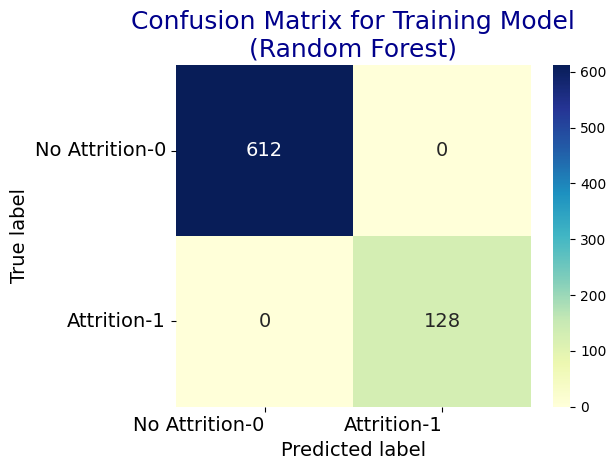

In [67]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred_rdf)), ('No Attrition-0', 'Attrition-1'), ('No Attrition-0', 'Attrition-1'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Random Forest)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

#### Evaluasi Testing Model

In [68]:
# classification report - testing model
print('Classification Report Testing Model (Random Forest Classifier) :')
print(classification_report(y_test,y_test_pred_rdf))

Classification Report Testing Model (Random Forest Classifier) :
              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89       267
         1.0       0.19      0.06      0.09        51

    accuracy                           0.81       318
   macro avg       0.51      0.51      0.49       318
weighted avg       0.74      0.81      0.76       318



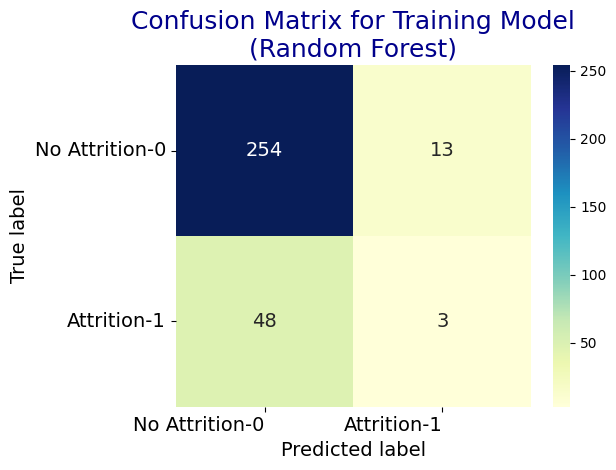

In [69]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred_rdf)), ('No Attrition-0', 'Attrition-1'), ('No Attrition-0', 'Attrition-1'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Random Forest)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

### Hyperparameter Tunning

In [70]:
#List Hyperparameters yang akan diuji
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

clf = GridSearchCV(estimator = model_rdf, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)

#Fitting Model
best_model = clf.fit(X_train,y_train)

#Nilai hyperparameters terbaik
print('Best parameter        :', best_model.best_estimator_)

#Prediksi menggunakan model baru
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

#Check performa dari model
# classification report - training model
print('\nClassification Report Training Model (Random Forest Classifier) :')
print(classification_report(y_train,y_train_pred))

# classification report - testing model
print('\nClassification Report Testing Model (Random Forest Classifier) :')
print(classification_report(y_test,y_test_pred))

Fitting 3 folds for each of 288 candidates, totalling 864 fits
Best parameter        : RandomForestClassifier(max_depth=90, max_features=2, min_samples_leaf=3,
                       min_samples_split=10)

Classification Report Training Model (Random Forest Classifier) :
              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93       612
         1.0       0.93      0.31      0.47       128

    accuracy                           0.88       740
   macro avg       0.90      0.65      0.70       740
weighted avg       0.88      0.88      0.85       740


Classification Report Testing Model (Random Forest Classifier) :
              precision    recall  f1-score   support

         0.0       0.84      0.97      0.90       267
         1.0       0.27      0.06      0.10        51

    accuracy                           0.82       318
   macro avg       0.56      0.51      0.50       318
weighted avg       0.75      0.82      0.77       318



In [71]:
# Melakukan export model
joblib.dump(best_model, "random_forest.joblib")

['random_forest.joblib']